In [1]:
# Problem Statement

# The business problem is to optimize shipment scheduling and reduce delays by analyzing historical data on actual shipment times, planned shipment times, and delivery statuses for a specific carrier's routes between the source (IAD) and destination (TPA) in 2008.
# The objective is to analyze the historical shipment data for a specific carrier's routes between IAD and TPA in 2008 in order to identify patterns, optimize scheduling, and minimize shipment delays, ultimately improving the carrier's delivery performance."

# CRISP-ML(Q) process model describes six phases:
# 
# 1. Business and Data Understanding
# 2. Data Preparation
# 3. Model Building
# 4. Model Evaluation
# 5. Model Deployment
# 6. Monitoring and Maintenance




In [ ]:
# *Objective(s):* Minimize shipment delays for the specified carrier's routes between the source (IAD) and destination (TPA) in 2008.
# 
# *Constraints:* Maximize on-time deliveries by minimizing shipment delays while considering carrier-specific schedules and travel times.
# 

# *Success Criteria*
# 
# - *Business Success Criteria*: Achieve on-time delivery and reduce delays for maximum customer satisfaction.
#
# - *ML Success Criteria*: Minimize shipment delays and improve on-time deliveries using machine learning.
#
# - *Economic Success Criteria*: "Minimize operational costs while maximizing on-time deliveries and customer satisfaction."
#

# ## Data Collection

# Data: 
#   The dataset contains information for 2008 on shipment times, carriers, delays, source, destination, distance, and delivery statuses for specific routes.

# Data Dictionary:
# - Dataset contains 3604175 shipment record for a specific month in the year 2008.
# - 15 features are recorded for specific attributes related to shipments in the year 2008.
# 
# Description:
# Year: The year of the shipment (2008 in all records).
# Month: The month of the shipment.
# DayofMonth: The day of the month of the shipment.
# DayOfWeek: The day of the week of the shipment.
# Actual_Shipment_Time: The actual time of shipment in HHMM format (24-hour clock).
# Planned_Shipment_Time: The planned or scheduled time of shipment in HHMM format.
# Planned_Delivery_Time: The planned or scheduled time of delivery in HHMM format.
# Carrier_Name: The name of the carrier company.
# Carrier_Num: The carrier's identification number.
# Planned_TimeofTravel: The planned time duration of travel in minutes.
# Shipment_Delay: The delay in minutes (negative value indicates early arrival).
# Source: The source or origin of the shipment.
# Destination: The destination of the shipment.
# Distance: The distance in miles between the source and destination.
# Delivery_Status: The delivery status (0 indicates on time, 1 indicates delayed).

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import Winsorizer
from feature_engine import transformation
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from feature_engine.imputation import RandomSampleImputer
import scipy.stats as stats
import pylab

In [2]:
data = pd.read_csv("fedex.csv")

In [9]:
data


Year  Month  DayofMonth  DayOfWeek  Actual_Shipment_Time  \
0        2008      1           3          4                2003.0   
1        2008      1           3          4                 754.0   
2        2008      1           3          4                 628.0   
3        2008      1           3          4                 926.0   
4        2008      1           3          4                1829.0   
...       ...    ...         ...        ...                   ...   
3604170  2008      6          19          4                1059.0   
3604171  2008      6          19          4                 555.0   
3604172  2008      6          19          4                 821.0   
3604173  2008      6          19          4                 718.0   
3604174  2008      6          19          4                1127.0   

         Planned_Shipment_Time  Planned_Delivery_Time Carrier_Name  \
0                         1955                   2225           WN   
1                          735                   1000           WN   
2                          620                    750           WN   
3                          930                   1100           WN   
4                         1755                   1925           WN   
...                        ...                    ...          ...   
3604170                   1100                   1256           DL   
3604171                    600                    738           DL   
3604172                    827                   1003           DL   
3604173                    735                    852           DL   
3604174                    951                   1130           DL   

         Carrier_Num  Planned_TimeofTravel  Shipment_Delay Source Destination  \
0                335                 150.0             8.0    IAD         TPA   
1               3231                 145.0            19.0    IAD         TPA   
2                448                  90.0             8.0    IND         BWI   
3               1746                  90.0            -4.0    IND         BWI   
4               3920                  90.0            34.0    IND         BWI   
...              ...                   ...             ...    ...         ...   
3604170         1547                 236.0            -1.0    ATL         JAC   
3604171         1548                  98.0            -5.0    RSW         ATL   
3604172         1548                  96.0            -6.0    ATL         IND   
3604173         1551                  77.0           -17.0    CAE         ATL   
3604174         1551                 159.0            96.0    ATL         MSP   

         Distance  Delivery_Status  
0             810              0.0  
1             810              1.0  
2             515              0.0  
3             515              0.0  
4             515              1.0  
...           ...              ...  
3604170      1572              0.0  
3604171       515              0.0  
3604172       432              0.0  
3604173       191              0.0  
3604174       906              1.0  

[3604175 rows x 15 columns]

In [4]:
data.head(10)

Year  Month  DayofMonth  DayOfWeek  Actual_Shipment_Time  \
0  2008      1           3          4                2003.0   
1  2008      1           3          4                 754.0   
2  2008      1           3          4                 628.0   
3  2008      1           3          4                 926.0   
4  2008      1           3          4                1829.0   
5  2008      1           3          4                1940.0   
6  2008      1           3          4                1937.0   
7  2008      1           3          4                1039.0   
8  2008      1           3          4                 617.0   
9  2008      1           3          4                1620.0   

   Planned_Shipment_Time  Planned_Delivery_Time Carrier_Name  Carrier_Num  \
0                   1955                   2225           WN          335   
1                    735                   1000           WN         3231   
2                    620                    750           WN          448   
3                    930                   1100           WN         1746   
4                   1755                   1925           WN         3920   
5                   1915                   2110           WN          378   
6                   1830                   1940           WN          509   
7                   1040                   1150           WN          535   
8                    615                    650           WN           11   
9                   1620                   1655           WN          810   

   Planned_TimeofTravel  Shipment_Delay Source Destination  Distance  \
0                 150.0             8.0    IAD         TPA       810   
1                 145.0            19.0    IAD         TPA       810   
2                  90.0             8.0    IND         BWI       515   
3                  90.0            -4.0    IND         BWI       515   
4                  90.0            34.0    IND         BWI       515   
5                 115.0            25.0    IND         JAX       688   
6                 250.0            67.0    IND         LAS      1591   
7                 250.0            -1.0    IND         LAS      1591   
8                  95.0             2.0    IND         MCI       451   
9                  95.0             0.0    IND         MCI       451   

   Delivery_Status  
0              0.0  
1              1.0  
2              0.0  
3              0.0  
4              1.0  
5              1.0  
6              1.0  
7              0.0  
8              0.0  
9              0.0

In [5]:
data.tail(10)

Year  Month  DayofMonth  DayOfWeek  Actual_Shipment_Time  \
3604165  2008      6          19          4                1333.0   
3604166  2008      6          19          4                1728.0   
3604167  2008      6          19          4                 819.0   
3604168  2008      6          19          4                 858.0   
3604169  2008      6          19          4                1135.0   
3604170  2008      6          19          4                1059.0   
3604171  2008      6          19          4                 555.0   
3604172  2008      6          19          4                 821.0   
3604173  2008      6          19          4                 718.0   
3604174  2008      6          19          4                1127.0   

         Planned_Shipment_Time  Planned_Delivery_Time Carrier_Name  \
3604165                   1335                   1604           DL   
3604166                   1725                   1751           DL   
3604167                    825                    959           DL   
3604168                    900                   1028           DL   
3604169                   1120                   1834           DL   
3604170                   1100                   1256           DL   
3604171                    600                    738           DL   
3604172                    827                   1003           DL   
3604173                    735                    852           DL   
3604174                    951                   1130           DL   

         Carrier_Num  Planned_TimeofTravel  Shipment_Delay Source Destination  \
3604165         1542                  89.0            -2.0    MEM         ATL   
3604166         1543                  86.0             3.0    ATL         MEM   
3604167         1544                  94.0            -6.0    IND         ATL   
3604168         1545                 268.0            -2.0    CVG         SNA   
3604169         1546                 254.0            15.0    SNA         CVG   
3604170         1547                 236.0            -1.0    ATL         JAC   
3604171         1548                  98.0            -5.0    RSW         ATL   
3604172         1548                  96.0            -6.0    ATL         IND   
3604173         1551                  77.0           -17.0    CAE         ATL   
3604174         1551                 159.0            96.0    ATL         MSP   

         Distance  Delivery_Status  
3604165       332              0.0  
3604166       332              0.0  
3604167       432              0.0  
3604168      1877              0.0  
3604169      1877              0.0  
3604170      1572              0.0  
3604171       515              0.0  
3604172       432              0.0  
3604173       191              0.0  
3604174       906              1.0

In [6]:
data.dtypes

Year                       int64
Month                      int64
DayofMonth                 int64
DayOfWeek                  int64
Actual_Shipment_Time     float64
Planned_Shipment_Time      int64
Planned_Delivery_Time      int64
Carrier_Name              object
Carrier_Num                int64
Planned_TimeofTravel     float64
Shipment_Delay           float64
Source                    object
Destination               object
Distance                   int64
Delivery_Status          float64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3604175 entries, 0 to 3604174
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Year                   int64  
 1   Month                  int64  
 2   DayofMonth             int64  
 3   DayOfWeek              int64  
 4   Actual_Shipment_Time   float64
 5   Planned_Shipment_Time  int64  
 6   Planned_Delivery_Time  int64  
 7   Carrier_Name           object 
 8   Carrier_Num            int64  
 9   Planned_TimeofTravel   float64
 10  Shipment_Delay         float64
 11  Source                 object 
 12  Destination            object 
 13  Distance               int64  
 14  Delivery_Status        float64
dtypes: float64(4), int64(8), object(3)
memory usage: 412.5+ MB


In [8]:
data.describe()

Year         Month    DayofMonth     DayOfWeek  \
count  3604175.0  3.604175e+06  3.604175e+06  3.604175e+06   
mean      2008.0  3.514942e+00  1.568481e+01  3.934604e+00   
std          0.0  1.709912e+00  8.763332e+00  1.987126e+00   
min       2008.0  1.000000e+00  1.000000e+00  1.000000e+00   
25%       2008.0  2.000000e+00  8.000000e+00  2.000000e+00   
50%       2008.0  4.000000e+00  1.600000e+01  4.000000e+00   
75%       2008.0  5.000000e+00  2.300000e+01  6.000000e+00   
max       2008.0  6.000000e+00  3.100000e+01  7.000000e+00   

       Actual_Shipment_Time  Planned_Shipment_Time  Planned_Delivery_Time  \
count          3.522573e+06           3.604175e+06           3.604175e+06   
mean           1.338455e+03           1.329371e+03           1.495305e+03   
std            4.814053e+02           4.664365e+02           4.854825e+02   
min            1.000000e+00           0.000000e+00           0.000000e+00   
25%            9.290000e+02           9.250000e+02           1.115000e+03   
50%            1.329000e+03           1.321000e+03           1.519000e+03   
75%            1.733000e+03           1.720000e+03           1.910000e+03   
max            2.400000e+03           2.359000e+03           2.400000e+03   

        Carrier_Num  Planned_TimeofTravel  Shipment_Delay      Distance  \
count  3.604175e+06          3.603628e+06    3.522573e+06  3.604175e+06   
mean   2.223795e+03          1.291603e+02    1.115893e+01  7.280915e+02   
std    1.944583e+03          6.951011e+01    3.618888e+01  5.611318e+02   
min    1.000000e+00         -2.500000e+01   -9.200000e+01  1.100000e+01   
25%    6.160000e+02          8.000000e+01   -4.000000e+00  3.250000e+02   
50%    1.573000e+03          1.110000e+02   -1.000000e+00  5.830000e+02   
75%    3.602000e+03          1.600000e+02    1.000000e+01  9.570000e+02   
max    9.741000e+03          1.435000e+03    2.467000e+03  4.962000e+03   

       Delivery_Status  
count     3.522573e+06  
mean      2.038890e-01  
std       4.028875e-01  
min       0.000000e+00  
25%       0.000000e+00  
50%       0.000000e+00  
75%       0.000000e+00  
max       1.000000e+00

# Measure of central tendency
Mean

In [9]:
print(data.mean(numeric_only=True))

Year                     2008.000000
Month                       3.514942
DayofMonth                 15.684810
DayOfWeek                   3.934604
Actual_Shipment_Time     1338.454638
Planned_Shipment_Time    1329.370510
Planned_Delivery_Time    1495.304509
Carrier_Num              2223.794964
Planned_TimeofTravel      129.160345
Shipment_Delay             11.158930
Distance                  728.091460
Delivery_Status             0.203889
dtype: float64


# Median

In [10]:
print(data.median(numeric_only=True))

Year                     2008.0
Month                       4.0
DayofMonth                 16.0
DayOfWeek                   4.0
Actual_Shipment_Time     1329.0
Planned_Shipment_Time    1321.0
Planned_Delivery_Time    1519.0
Carrier_Num              1573.0
Planned_TimeofTravel      111.0
Shipment_Delay             -1.0
Distance                  583.0
Delivery_Status             0.0
dtype: float64


# Mode

In [11]:
print(data.mode(numeric_only=True))

   Year  Month  DayofMonth  DayOfWeek  Actual_Shipment_Time  \
0  2008      3          18          5                 555.0   

   Planned_Shipment_Time  Planned_Delivery_Time  Carrier_Num  \
0                    600                   1930           16   

   Planned_TimeofTravel  Shipment_Delay  Distance  Delivery_Status  
0                  75.0             0.0       337              0.0  


# Median

In [12]:
data.median()

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_10728\4184645713.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()


Year                     2008.0
Month                       4.0
DayofMonth                 16.0
DayOfWeek                   4.0
Actual_Shipment_Time     1329.0
Planned_Shipment_Time    1321.0
Planned_Delivery_Time    1519.0
Carrier_Num              1573.0
Planned_TimeofTravel      111.0
Shipment_Delay             -1.0
Distance                  583.0
Delivery_Status             0.0
dtype: float64

In [13]:
data.mode()

Year  Month  DayofMonth  DayOfWeek  Actual_Shipment_Time  \
0  2008      3          18          5                 555.0   

   Planned_Shipment_Time  Planned_Delivery_Time Carrier_Name  Carrier_Num  \
0                    600                   1930           WN           16   

   Planned_TimeofTravel  Shipment_Delay Source Destination  Distance  \
0                  75.0             0.0    ATL         ATL       337   

   Delivery_Status  
0              0.0

# Varience

In [14]:
data.var()

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_10728\445316826.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.var()


Year                     5.169880e-26
Month                    2.923798e+00
DayofMonth               7.679599e+01
DayOfWeek                3.948669e+00
Actual_Shipment_Time     2.317510e+05
Planned_Shipment_Time    2.175630e+05
Planned_Delivery_Time    2.356933e+05
Carrier_Num              3.781402e+06
Planned_TimeofTravel     4.831656e+03
Shipment_Delay           1.309635e+03
Distance                 3.148689e+05
Delivery_Status          1.623183e-01
dtype: float64

# Standard deviation/SD

In [15]:
data.std()

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_10728\2723740006.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.std()


Year                     2.273737e-13
Month                    1.709912e+00
DayofMonth               8.763332e+00
DayOfWeek                1.987126e+00
Actual_Shipment_Time     4.814053e+02
Planned_Shipment_Time    4.664365e+02
Planned_Delivery_Time    4.854825e+02
Carrier_Num              1.944583e+03
Planned_TimeofTravel     6.951011e+01
Shipment_Delay           3.618888e+01
Distance                 5.611318e+02
Delivery_Status          4.028875e-01
dtype: float64

# Range

In [16]:
range = max(data.Actual_Shipment_Time) - min(data.Actual_Shipment_Time)
range

2399.0

In [17]:
range = max(data.Actual_Shipment_Time) - min(data.Actual_Shipment_Time)
range

2399.0

In [18]:
range = max(data.Actual_Shipment_Time) - min(data.Actual_Shipment_Time)
range

2399.0

In [19]:
range = max(data.Planned_Shipment_Time ) - min(data.Planned_Shipment_Time )
range

2359

In [20]:
range = max(data.Planned_Delivery_Time   ) - min(data.Planned_Delivery_Time   )
range

2400

In [21]:
range = max(data.Carrier_Num   ) - min(data.Carrier_Num  )
range

9740

In [22]:
range = max(data.Distance  ) - min(data.Distance  )
range

4951

# Third moment bussiness decission

In [23]:
data.skew()

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_10728\1188251951.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


Year                     0.000000
Month                   -0.016885
DayofMonth               0.005828
DayOfWeek                0.048492
Actual_Shipment_Time     0.043877
Planned_Shipment_Time    0.081864
Planned_Delivery_Time   -0.207589
Carrier_Num              0.894852
Planned_TimeofTravel     1.501040
Shipment_Delay           6.256650
Distance                 1.629239
Delivery_Status          1.469945
dtype: float64

In [24]:
data.kurt()

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_10728\2907027414.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.kurt()


Year                      0.000000
Month                    -1.264568
DayofMonth               -1.194503
DayOfWeek                -1.214068
Actual_Shipment_Time     -0.985402
Planned_Shipment_Time    -1.047931
Planned_Delivery_Time    -0.603208
Carrier_Num              -0.244555
Planned_TimeofTravel      2.800786
Shipment_Delay           96.065623
Distance                  3.309955
Delivery_Status           0.160737
dtype: float64

# Data Visulization

In [29]:
data.shape

(3604175, 15)

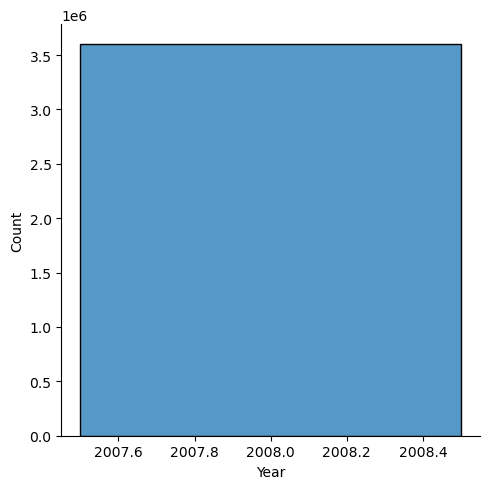

In [30]:
sns.displot(data.Year)


(array([      0.,       0.,       0.,       0.,       0., 3604175.,
              0.,       0.,       0.,       0.]),
 array([2007.5, 2007.6, 2007.7, 2007.8, 2007.9, 2008. , 2008.1, 2008.2,
        2008.3, 2008.4, 2008.5]),
 <BarContainer object of 10 artists>)

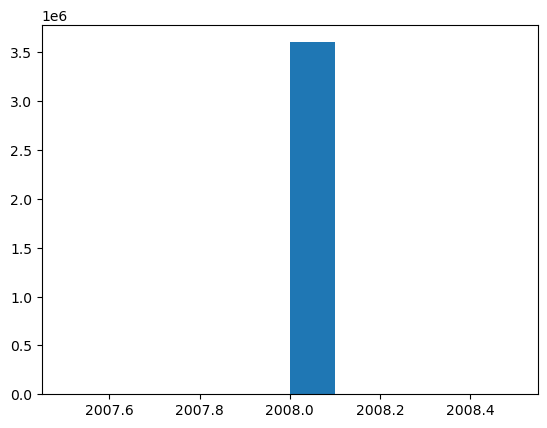

In [31]:
plt.hist(data.Year)

# Data pre-prossesing

# Type casting

In [36]:
data['Actual_Shipment_Time'] = pd.to_datetime(data['Actual_Shipment_Time'])
data.dtypes

Year                              int64
Month                             int64
DayofMonth                        int64
DayOfWeek                         int64
Actual_Shipment_Time     datetime64[ns]
Planned_Shipment_Time             int64
Planned_Delivery_Time             int64
Carrier_Name                     object
Carrier_Num                       int64
Planned_TimeofTravel            float64
Shipment_Delay                  float64
Source                           object
Destination                      object
Distance                          int64
Delivery_Status                 float64
dtype: object

# Duplicates


In [3]:
duplicate = data.duplicated()
duplicate
sum(duplicate)

4

In [ ]:
# Para

In [ ]:
# Correlation coefficient
data.corr(numeric_only = True)

# Outlier Treatment

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from feature_engine.outliers import winsorizer

In [3]:
pip install feature_engine


  Obtaining dependency information for feature_engine from https://files.pythonhosted.org/packages/62/60/77fcc9d3cfaabab34027aa8ea0025c5e2d4cf9561fa9725a38f0785b43aa/feature_engine-1.6.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/328.9 kB ? eta -:--:--
   -------------- ------------------------- 122.9/328.9 kB 2.4 MB/s eta 0:00:01
   ------------------------ --------------- 204.8/328.9 kB 3.1 MB/s eta 0:00:01
   --------------------------------- ------ 276.5/328.9 kB 2.1 MB/s eta 0:00:01
   ---------------------------------- ----- 286.7/328.9 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 328.9/328.9 kB 1.6 MB/s eta 0:00:00


<Axes: >

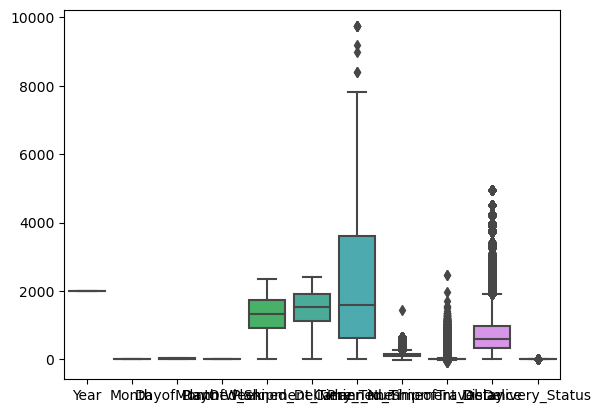

In [38]:
sns.boxplot(data)

# Detection of outliers (find limits for  based on IQR)

In [9]:
IQR = data.quantile(0.75) - data.quantile(0.25)
IQR

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_8044\2178610751.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = data.quantile(0.75) - data.quantile(0.25)


Year                        0.0
Month                       3.0
DayofMonth                 15.0
DayOfWeek                   4.0
Actual_Shipment_Time      804.0
Planned_Shipment_Time     795.0
Planned_Delivery_Time     795.0
Carrier_Num              2986.0
Planned_TimeofTravel       80.0
Shipment_Delay             14.0
Distance                  632.0
Delivery_Status             0.0
dtype: float64

In [10]:
upper_limit = data.quantile(0.75) + (IQR * 1.5)
upper_limit

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_8044\1666366591.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  upper_limit = data.quantile(0.75) + (IQR * 1.5)


Year                     2008.0
Month                       9.5
DayofMonth                 45.5
DayOfWeek                  12.0
Actual_Shipment_Time     2939.0
Planned_Shipment_Time    2912.5
Planned_Delivery_Time    3102.5
Carrier_Num              8081.0
Planned_TimeofTravel      280.0
Shipment_Delay             31.0
Distance                 1905.0
Delivery_Status             0.0
dtype: float64

In [11]:
lower_limit = data.quantile(0.25) - (IQR * 1.5)
lower_limit

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_8044\1519038491.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower_limit = data.quantile(0.25) - (IQR * 1.5)


Year                     2008.0
Month                      -2.5
DayofMonth                -14.5
DayOfWeek                  -4.0
Actual_Shipment_Time     -277.0
Planned_Shipment_Time    -267.5
Planned_Delivery_Time     -77.5
Carrier_Num             -3863.0
Planned_TimeofTravel      -40.0
Shipment_Delay            -25.0
Distance                 -623.0
Delivery_Status             0.0
dtype: float64

# Trimming Technique

In [12]:
IQR = data['Carrier_Num'].quantile(0.75) - data['Carrier_Num'].quantile(0.25)

lower_limit = data['Carrier_Num'].quantile(0.25) - (IQR * 1.5)
lower_limit
upper_limit = data['Carrier_Num'].quantile(0.75) + (IQR * 1.5)
upper_limit

8081.0

<Axes: >

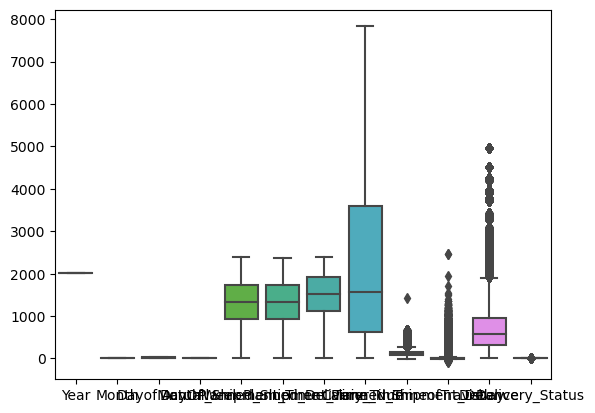

In [13]:
############### 1. Remove (let's trim the dataset) ################
# Trimming Technique

outliers_data = np.where(data['Carrier_Num' ]> upper_limit, True, np.where(data['Carrier_Num'] < lower_limit, True, False))
sum(outliers_data)


data_out = data.loc[outliers_data, ]

data_trimmed = data.loc[~(outliers_data), ]
data.shape, data_trimmed.shape

# Let's explore outliers in the trimmed dataset
sns.boxplot(data_trimmed)

<Axes: >

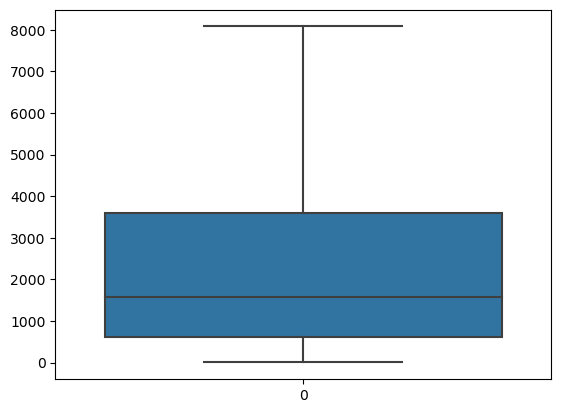

In [14]:
# Replace
# Replace the outliers by the maximum and minimum limit
data['data_replaced'] = pd.DataFrame(np.where(data['Carrier_Num'] > upper_limit, upper_limit, np.where(data['Carrier_Num'] < lower_limit, lower_limit, data['Carrier_Num'])))
sns.boxplot(data.data_replaced)

<Axes: >

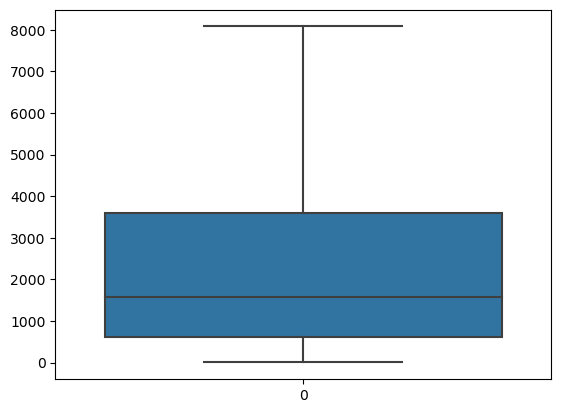

In [19]:
# Define the model with percentiles:


# Define the model with IQR method
winsor_iqr = Winsorizer(capping_method = 'iqr', 
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5, 
                          variables = ['Carrier_Num'])

data_s = winsor_iqr.fit_transform(data[['Carrier_Num']])

# Inspect the minimum caps and maximum caps
# winsor.left_tail_caps_, winsor.right_tail_caps_

# Let's see boxplot
sns.boxplot(data_s.Carrier_Num)

<Axes: >

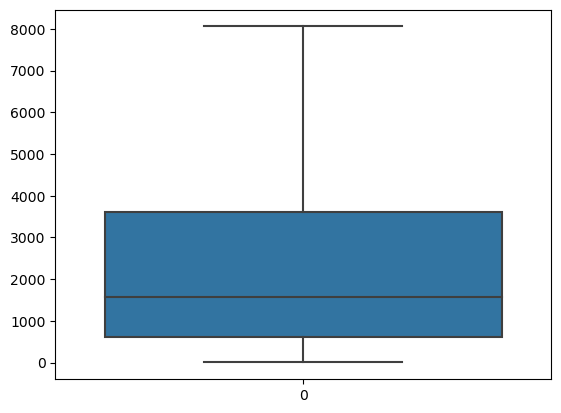

In [22]:
# Define the model with Gaussian method
winsor_gaussian = Winsorizer(capping_method = 'gaussian', 
                             # choose IQR rule boundaries or gaussian for mean and std
                          tail = 'both', # cap left, right or both tails 
                          fold = 3,
                          variables = ['Carrier_Num'])

data_t = winsor_gaussian.fit_transform(data[['Carrier_Num']])
sns.boxplot(data_t.Carrier_Num)

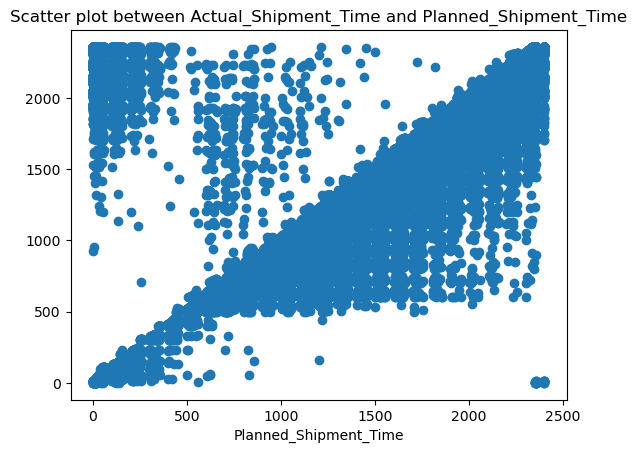

In [26]:
# creating a sctter plot between 'Actual_Shipment_Time' and 'Planned_Shipment_Time'
plt.scatter(data['Actual_Shipment_Time'], data['Planned_Shipment_Time'])
plt.xlabel('Actual_Shipment_Time')
plt.xlabel('Planned_Shipment_Time')
plt.title('Scatter plot between Actual_Shipment_Time and Planned_Shipment_Time')
plt.show()

# Zero Varience and near Zero Varience

In [47]:
data.iloc[:3604175,:] #slicing method

Year  Month  DayofMonth  DayOfWeek  Actual_Shipment_Time  \
0        2008      1           3          4                2003.0   
1        2008      1           3          4                 754.0   
2        2008      1           3          4                 628.0   
3        2008      1           3          4                 926.0   
4        2008      1           3          4                1829.0   
...       ...    ...         ...        ...                   ...   
3604170  2008      6          19          4                1059.0   
3604171  2008      6          19          4                 555.0   
3604172  2008      6          19          4                 821.0   
3604173  2008      6          19          4                 718.0   
3604174  2008      6          19          4                1127.0   

         Planned_Shipment_Time  Planned_Delivery_Time Carrier_Name  \
0                         1955                   2225           WN   
1                          735                   1000           WN   
2                          620                    750           WN   
3                          930                   1100           WN   
4                         1755                   1925           WN   
...                        ...                    ...          ...   
3604170                   1100                   1256           DL   
3604171                    600                    738           DL   
3604172                    827                   1003           DL   
3604173                    735                    852           DL   
3604174                    951                   1130           DL   

         Carrier_Num  Planned_TimeofTravel  Shipment_Delay Source Destination  \
0                335                 150.0             8.0    IAD         TPA   
1               3231                 145.0            19.0    IAD         TPA   
2                448                  90.0             8.0    IND         BWI   
3               1746                  90.0            -4.0    IND         BWI   
4               3920                  90.0            34.0    IND         BWI   
...              ...                   ...             ...    ...         ...   
3604170         1547                 236.0            -1.0    ATL         JAC   
3604171         1548                  98.0            -5.0    RSW         ATL   
3604172         1548                  96.0            -6.0    ATL         IND   
3604173         1551                  77.0           -17.0    CAE         ATL   
3604174         1551                 159.0            96.0    ATL         MSP   

         Distance  Delivery_Status  
0             810              0.0  
1             810              1.0  
2             515              0.0  
3             515              0.0  
4             515              1.0  
...           ...              ...  
3604170      1572              0.0  
3604171       515              0.0  
3604172       432              0.0  
3604173       191              0.0  
3604174       906              1.0  

[3604175 rows x 15 columns]

In [48]:
# If the variance is low or close to zero, then a feature is approximately constant and will not improve the performance of the model.
# In that case, it should be removed. 

In [49]:
data.var(numeric_only = True, axis = 0) == 0 #for column

Year                     False
Month                    False
DayofMonth               False
DayOfWeek                False
Actual_Shipment_Time     False
Planned_Shipment_Time    False
Planned_Delivery_Time    False
Carrier_Num              False
Planned_TimeofTravel     False
Shipment_Delay           False
Distance                 False
Delivery_Status          False
dtype: bool

In [50]:
data.var(numeric_only = True, axis = 1) == 0 #for column

0          False
1          False
2          False
3          False
4          False
           ...  
3604170    False
3604171    False
3604172    False
3604173    False
3604174    False
Length: 3604175, dtype: bool

In [53]:
data.value_counts()

Year  Month  DayofMonth  DayOfWeek  Actual_Shipment_Time  Planned_Shipment_Time  Planned_Delivery_Time  Carrier_Name  Carrier_Num  Planned_TimeofTravel  Shipment_Delay  Source  Destination  Distance  Delivery_Status
2008  2      28          4          2027.0                1942                   2229                   F9            780          107.0                  45.0           LAS     DEN          629       1.0                2
                                    1427.0                1435                   1636                   F9            727          241.0                 -8.0            DCA     DEN          1476      0.0                2
                                    1854.0                1807                   1902                   F9            773          115.0                  47.0           DEN     LAS          629       1.0                2
                                    829.0                 835                    1350                   F9            728

# Missing Values - Imputation

In [13]:
# Check for count of NA's in each column
data.isna().sum()

Year                         0
Month                        0
DayofMonth                   0
DayOfWeek                    0
Actual_Shipment_Time     81602
Planned_Shipment_Time        0
Planned_Delivery_Time        0
Carrier_Name                 0
Carrier_Num                  0
Planned_TimeofTravel       547
Shipment_Delay           81602
Source                       0
Destination                  0
Distance                     0
Delivery_Status          81602
dtype: int64

In [14]:
# Mean Imputer 
mean_imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
data["Actual_Shipment_Time  "] = pd.DataFrame(mean_imputer.fit_transform(data[["Actual_Shipment_Time"]]))
data["Actual_Shipment_Time"].isna().sum()
data.isna().sum()

Year                          0
Month                         0
DayofMonth                    0
DayOfWeek                     0
Actual_Shipment_Time      81602
Planned_Shipment_Time         0
Planned_Delivery_Time         0
Carrier_Name                  0
Carrier_Num                   0
Planned_TimeofTravel        547
Shipment_Delay            81602
Source                        0
Destination                   0
Distance                      0
Delivery_Status           81602
Actual_Shipment_Time          0
dtype: int64

In [15]:
# Median Imputer
median_imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
data["Planned_TimeofTravel"] = pd.DataFrame(median_imputer.fit_transform(data[["Planned_TimeofTravel"]]))
data["Planned_TimeofTravel"].isna().sum()  # all records replaced by median 

data.isna().sum()

Year                          0
Month                         0
DayofMonth                    0
DayOfWeek                     0
Actual_Shipment_Time      81602
Planned_Shipment_Time         0
Planned_Delivery_Time         0
Carrier_Name                  0
Carrier_Num                   0
Planned_TimeofTravel          0
Shipment_Delay            81602
Source                        0
Destination                   0
Distance                      0
Delivery_Status           81602
Actual_Shipment_Time          0
dtype: int64

In [16]:
# Mode Imputer
mode_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data["Shipment_Delay"] = pd.DataFrame(mode_imputer.fit_transform(data[["Shipment_Delay"]]))
data["Shipment_Delay"] = pd.DataFrame(mode_imputer.fit_transform(data[["Shipment_Delay"]]))
data.isnull().sum()  # all  records replaced by mode


Year                          0
Month                         0
DayofMonth                    0
DayOfWeek                     0
Actual_Shipment_Time      81602
Planned_Shipment_Time         0
Planned_Delivery_Time         0
Carrier_Name                  0
Carrier_Num                   0
Planned_TimeofTravel          0
Shipment_Delay                0
Source                        0
Destination                   0
Distance                      0
Delivery_Status           81602
Actual_Shipment_Time          0
dtype: int64

In [10]:
# Random Imputer
random_imputer = RandomSampleImputer(['Delivery_Status'])
data["Delivery_Status"] = pd.DataFrame(random_imputer.fit_transform(data[["Delivery_Status"]]))
data["Delivery_Status"].isna().sum()  # all records replaced by median
data.isnull().sum()  

Year                         0
Month                        0
DayofMonth                   0
DayOfWeek                    0
Actual_Shipment_Time     81602
Planned_Shipment_Time        0
Planned_Delivery_Time        0
Carrier_Name                 0
Carrier_Num                  0
Planned_TimeofTravel       547
Shipment_Delay           81602
Source                       0
Destination                  0
Distance                     0
Delivery_Status              0
dtype: int64

# Discretization

In [22]:
data.head()

Year  Month  DayofMonth  DayOfWeek  Actual_Shipment_Time  \
0  2008      1           3          4                2003.0   
1  2008      1           3          4                 754.0   
2  2008      1           3          4                 628.0   
3  2008      1           3          4                 926.0   
4  2008      1           3          4                1829.0   

   Planned_Shipment_Time  Planned_Delivery_Time Carrier_Name  Carrier_Num  \
0                   1955                   2225           WN          335   
1                    735                   1000           WN         3231   
2                    620                    750           WN          448   
3                    930                   1100           WN         1746   
4                   1755                   1925           WN         3920   

   Planned_TimeofTravel  Shipment_Delay Source Destination  Distance  \
0                 150.0             8.0    IAD         TPA       810   
1                 145.0            19.0    IAD         TPA       810   
2                  90.0             8.0    IND         BWI       515   
3                  90.0            -4.0    IND         BWI       515   
4                  90.0            34.0    IND         BWI       515   

   Delivery_Status  data_replaced  
0              0.0          335.0  
1              1.0         3231.0  
2              0.0          448.0  
3              0.0         1746.0  
4              1.0         3920.0

In [23]:
data.tail()

Year  Month  DayofMonth  DayOfWeek  Actual_Shipment_Time  \
3604170  2008      6          19          4                1059.0   
3604171  2008      6          19          4                 555.0   
3604172  2008      6          19          4                 821.0   
3604173  2008      6          19          4                 718.0   
3604174  2008      6          19          4                1127.0   

         Planned_Shipment_Time  Planned_Delivery_Time Carrier_Name  \
3604170                   1100                   1256           DL   
3604171                    600                    738           DL   
3604172                    827                   1003           DL   
3604173                    735                    852           DL   
3604174                    951                   1130           DL   

         Carrier_Num  Planned_TimeofTravel  Shipment_Delay Source Destination  \
3604170         1547                 236.0            -1.0    ATL         JAC   
3604171         1548                  98.0            -5.0    RSW         ATL   
3604172         1548                  96.0            -6.0    ATL         IND   
3604173         1551                  77.0           -17.0    CAE         ATL   
3604174         1551                 159.0            96.0    ATL         MSP   

         Distance  Delivery_Status  data_replaced  
3604170      1572              0.0         1547.0  
3604171       515              0.0         1548.0  
3604172       432              0.0         1548.0  
3604173       191              0.0         1551.0  
3604174       906              1.0         1551.0

In [27]:
data['Carrier_Num_multi'] = pd.cut(data['Carrier_Num'], 
                              bins = [min(data.Carrier_Num), 
                                      data.Carrier_Num.quantile(0.25),
                                      data.Carrier_Num.mean(),
                                      data.Carrier_Num.quantile(0.75),
                                      max(data.Carrier_Num)], 
                              include_lowest = True,
                              labels = ["P1", "P2", "P3", "P4"])
data['Carrier_Num_multi '] = pd.cut(data['Carrier_Num'], 
                              bins = 4, 
                              include_lowest = True,
                              labels = ["P1", "P2", "P3", "P4"])        


In [28]:
data.Carrier_Num_multi.value_counts()

P2    1301875
P1     902136
P4     900885
P3     499279
Name: Carrier_Num_multi, dtype: int64

# Dummy Variables ##############

In [31]:
data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Actual_Shipment_Time',
       'Planned_Shipment_Time', 'Planned_Delivery_Time', 'Carrier_Name',
       'Carrier_Num', 'Planned_TimeofTravel', 'Shipment_Delay', 'Source',
       'Destination', 'Distance', 'Delivery_Status', 'data_replaced',
       'Carrier_Num_multi', 'Carrier_Num_multi '],
      dtype='object')

In [33]:
data=data.iloc[:2000,:]

In [34]:
# Create dummy variables
data_new = pd.get_dummies(data)
data_new

Year  Month  DayofMonth  DayOfWeek  Actual_Shipment_Time  \
0     2008      1           3          4                2003.0   
1     2008      1           3          4                 754.0   
2     2008      1           3          4                 628.0   
3     2008      1           3          4                 926.0   
4     2008      1           3          4                1829.0   
...    ...    ...         ...        ...                   ...   
1995  2008      1           3          4                1557.0   
1996  2008      1           3          4                 855.0   
1997  2008      1           3          4                1652.0   
1998  2008      1           3          4                1057.0   
1999  2008      1           3          4                2014.0   

      Planned_Shipment_Time  Planned_Delivery_Time  Carrier_Num  \
0                      1955                   2225          335   
1                       735                   1000         3231   
2                       620                    750          448   
3                       930                   1100         1746   
4                      1755                   1925         3920   
...                     ...                    ...          ...   
1995                   1520                   1650         2969   
1996                    855                   1025         3234   
1997                   1625                   1730         1022   
1998                   1030                   1140         1041   
1999                   1935                   2045         1662   

      Planned_TimeofTravel  Shipment_Delay  ...  Destination_TUL  \
0                    150.0             8.0  ...                0   
1                    145.0            19.0  ...                0   
2                     90.0             8.0  ...                0   
3                     90.0            -4.0  ...                0   
4                     90.0            34.0  ...                0   
...                    ...             ...  ...              ...   
1995                  90.0            37.0  ...                0   
1996                  90.0             0.0  ...                0   
1997                  65.0            27.0  ...                0   
1998                  70.0            27.0  ...                0   
1999                  70.0            39.0  ...                0   

      Destination_TUS  Carrier_Num_multi_P1  Carrier_Num_multi_P2  \
0                   0                     1                     0   
1                   0                     0                     0   
2                   0                     1                     0   
3                   0                     0                     1   
4                   0                     0                     0   
...               ...                   ...                   ...   
1995                0                     0                     0   
1996                0                     0                     0   
1997                0                     0                     1   
1998                0                     0                     1   
1999                0                     0                     1   

      Carrier_Num_multi_P3  Carrier_Num_multi_P4  Carrier_Num_multi _P1  \
0                        0                     0                      1   
1                        1                     0                      0   
2                        0                     0                      1   
3                        0                     0                      1   
4                        0                     1                      0   
...                    ...                   ...                    ...   
1995                     1                     0                      0   
1996                     1                     0                      0   
1997                     0                     0                      1   
1998        

In [36]:
data = data[['Carrier_Num', 'Source', 'Destination']]

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
# Creating instance of One-Hot Encoder
enc = OneHotEncoder() # initializing method
enc_data = pd.DataFrame(enc.fit_transform(data).toarray())
enc_data = pd.DataFrame(enc.fit_transform(data.iloc[:, 2:]).toarray())
enc.fit_transform(data.iloc[:, 2:]).toarray()


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder

# Creating instance of labelencoder
labelencoder = LabelEncoder()

# Data Split into Input and Output variables
X = data.iloc[:2000,:15]


X['Carrier_Num'] = labelencoder.fit_transform(X['Carrier_Num'])
X['Source'] = labelencoder.fit_transform(X['Source'])
X['Destination'] = labelencoder.fit_transform(X['Destination'])


# Tranformation

In [4]:
import scipy.stats as stats
import pylab


((array([-3.39232293, -3.14126578, -3.00201262, ...,  3.00201262,
          3.14126578,  3.39232293]),
  array([   3,    4,    4, ..., 3948, 3948, 3949], dtype=int64)),
 (1106.1306384182922, 1479.2725000000003, 0.9519232506881309))

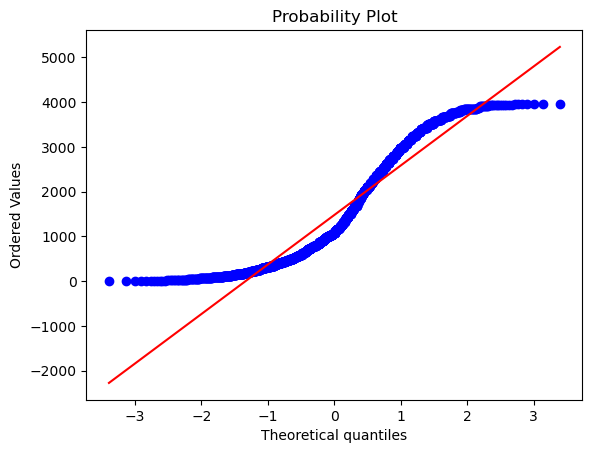

In [46]:
# checking whether data is normally distributed
stats.probplot(data.Carrier_Num , dist = "norm", plot = pylab)

((array([-3.39232293, -3.14126578, -3.00201262, ...,  3.00201262,
          3.14126578,  3.39232293]),
  array([1.09861229, 1.38629436, 1.38629436, ..., 8.2809644 , 8.2809644 ,
         8.28121766])),
 (1.094945966846689, 6.841544761150908, 0.959413254917554))

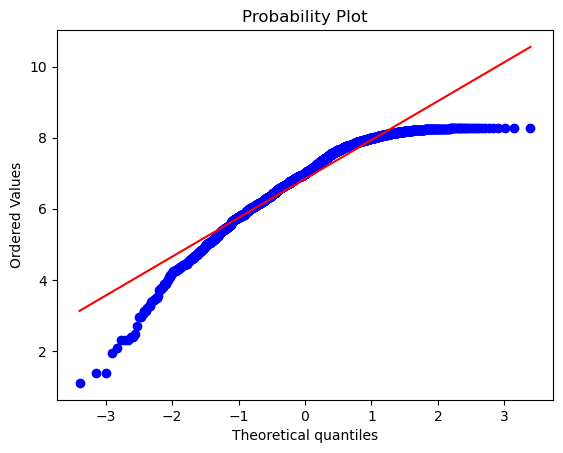

In [47]:
# Transformation to make workex variable normal
stats.probplot(np.log(data.Carrier_Num), dist = "norm", plot = pylab)

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_17236\2872132607.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Carrier_Num, hist = False, kde = True,
C:\Users\BENUDHAR SAHOO\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_17236\2872132607.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.


<Axes: ylabel='Density'>

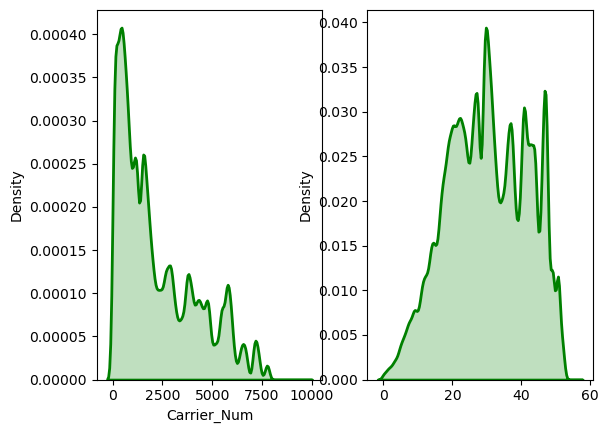

In [7]:
# Transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(data.Carrier_Num)

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)

# Plotting the original data (non-normal) and fitted data (normal)
sns.distplot(data.Carrier_Num, hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 2},
             label = "Non-Normal", color = "green", ax = ax[0])

sns.distplot(fitted_data, hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 2},
             label = "Normal", color = "green", ax = ax[1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Lambda value used for Transformation: 0.32046682245210717


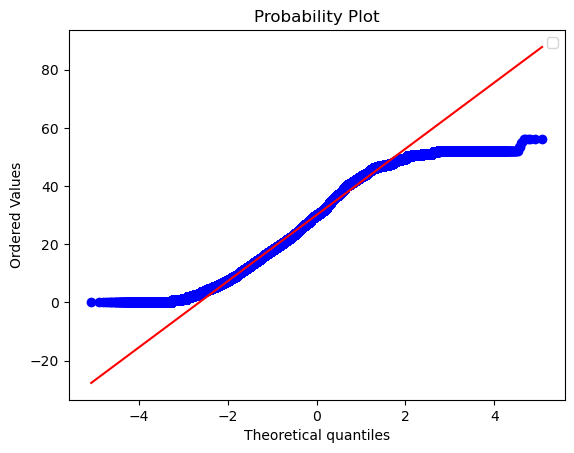

In [8]:
# adding legends to the subplots
plt.legend(loc = "upper right")

# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

print(f"Lambda value used for Transformation: {fitted_lambda}")

# Transformed data
prob = stats.probplot(fitted_data, dist = stats.norm, plot = pylab)

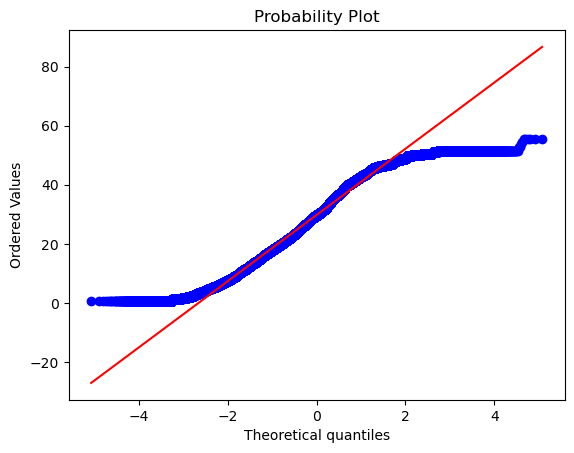

In [5]:
# Set up the variable transformer
tf1 = transformation.YeoJohnsonTransformer(variables = 'Carrier_Num')

data_tf = tf1.fit_transform(data)

# Transformed data
prob = stats.probplot(data_tf.Carrier_Num, dist = stats.norm, plot = pylab)


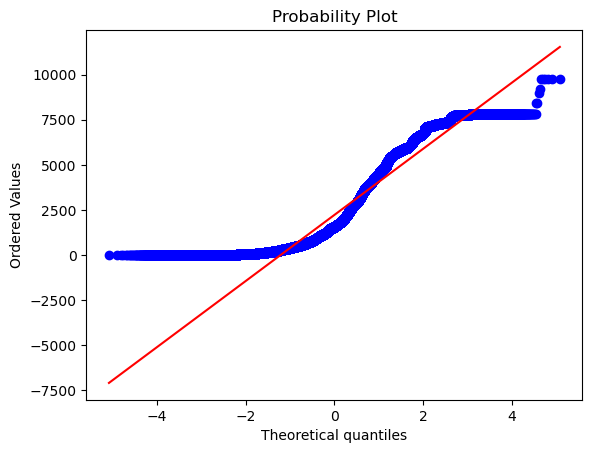

In [6]:
# Yeo-Johnson Transform

# We can apply it to our dataset without scaling the data.
#It supports zero values and negative values. It does not require the values for 
# each input variable to be strictly positive. 

#In Box-Cox transform the input variable has to be positive.

prob = stats.probplot(data.Carrier_Num, dist = stats.norm, plot = pylab)

# Standardization and Normalization #########

In [ ]:
data = pd.read_csv("fedex.csv")

In [6]:
data.dtypes

Year                       int64
Month                      int64
DayofMonth                 int64
DayOfWeek                  int64
Actual_Shipment_Time     float64
Planned_Shipment_Time      int64
Planned_Delivery_Time      int64
Carrier_Name              object
Carrier_Num                int64
Planned_TimeofTravel     float64
Shipment_Delay           float64
Source                    object
Destination               object
Distance                   int64
Delivery_Status          float64
dtype: object

In [7]:
data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Actual_Shipment_Time',
       'Planned_Shipment_Time', 'Planned_Delivery_Time', 'Carrier_Name',
       'Carrier_Num', 'Planned_TimeofTravel', 'Shipment_Delay', 'Source',
       'Destination', 'Distance', 'Delivery_Status'],
      dtype='object')

In [8]:
data = data[['Year', 'Month', 'DayofMonth', 'DayOfWeek','Planned_Shipment_Time', 'Planned_Delivery_Time','Carrier_Num','Distance']]

In [15]:

# Initialise the Scaler
scaler = StandardScaler()
# To scale data
data = scaler.fit_transform(data)
# Convert the array back to a dataframe
dataset = pd.DataFrame(data)
res = dataset.describe()

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
# Normalization
minmaxscale = MinMaxScaler()

data_n = minmaxscale.fit_transform(data)
dataset1 = pd.DataFrame(data_n)

res1 = dataset1.describe()


In [5]:
# Get dummies
fedex = pd.get_dummies(data, drop_first = True)

fedex.describe


<bound method NDFrame.describe of          Year  Month  DayofMonth  DayOfWeek  Actual_Shipment_Time  \
0        2008      1           3          4                2003.0   
1        2008      1           3          4                 754.0   
2        2008      1           3          4                 628.0   
3        2008      1           3          4                 926.0   
4        2008      1           3          4                1829.0   
...       ...    ...         ...        ...                   ...   
3604170  2008      6          19          4                1059.0   
3604171  2008      6          19          4                 555.0   
3604172  2008      6          19          4                 821.0   
3604173  2008      6          19          4                 718.0   
3604174  2008      6          19          4                1127.0   

         Planned_Shipment_Time  Planned_Delivery_Time  Carrier_Num  \
0                         1955                   2225          335 

In [13]:
### Normalization function - Custom Function
# Range converts to: 0 to 1
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

data_norm = norm_func(fedex)
data_norm.describe()

Year         Month    DayofMonth     DayOfWeek  Planned_Shipment_Time  \
count   0.0  3.604175e+06  3.604175e+06  3.604175e+06           3.604175e+06   
mean    NaN  5.029884e-01  4.894937e-01  4.891007e-01           5.635314e-01   
std     NaN  3.419823e-01  2.921111e-01  3.311877e-01           1.977264e-01   
min     NaN  0.000000e+00  0.000000e+00  0.000000e+00           0.000000e+00   
25%     NaN  2.000000e-01  2.333333e-01  1.666667e-01           3.921153e-01   
50%     NaN  6.000000e-01  5.000000e-01  5.000000e-01           5.599830e-01   
75%     NaN  8.000000e-01  7.333333e-01  8.333333e-01           7.291225e-01   
max     NaN  1.000000e+00  1.000000e+00  1.000000e+00           1.000000e+00   

       Planned_Delivery_Time   Carrier_Num      Distance  
count           3.604175e+06  3.604175e+06  3.604175e+06  
mean            6.230435e-01  2.282130e-01  1.448377e-01  
std             2.022844e-01  1.996491e-01  1.133371e-01  
min             0.000000e+00  0.000000e+00  0.000000e+00  
25%             4.645833e-01  6.314168e-02  6.342153e-02  
50%             6.329167e-01  1.613963e-01  1.155322e-01  
75%             7.958333e-01  3.697125e-01  1.910725e-01  
max             1.000000e+00  1.000000e+00  1.000000e+00

In [17]:
''' Alternatively we can use the below function'''
from sklearn.preprocessing import MinMaxScaler
minmaxscale = MinMaxScaler()

fedex_minmax = minmaxscale.fit_transform(fedex)
data_fedex = pd.DataFrame(fedex_minmax)
minmax_res = data_fedex.describe()

In [18]:
'''Robust Scaling
Scale features using statistics that are robust to outliers'''

from sklearn.preprocessing import RobustScaler

robust_model = RobustScaler()

data_robust = robust_model.fit_transform(fedex)

dataset_robust = pd.DataFrame(data_robust)
res_robust = dataset_robust.describe()

# Auto EDA

In [19]:
# Sweetviz
# Autoviz
# Dtale
# Pandas Profiling
# Dataprep

In [6]:
# Sweetviz
###########
#pip install sweetviz
import sweetviz as sv

                                             |                                             | [  0%]   00:00 ->…


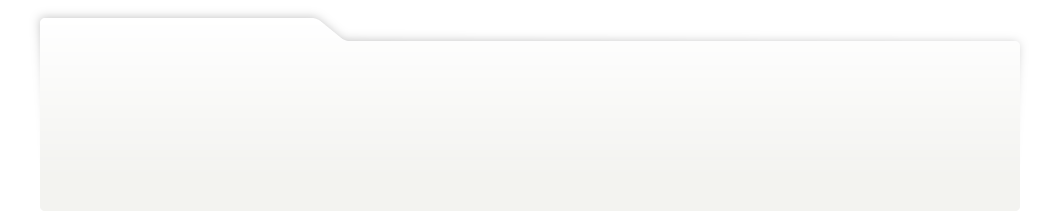
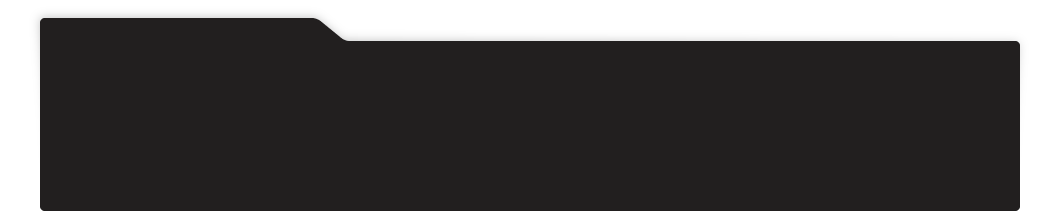
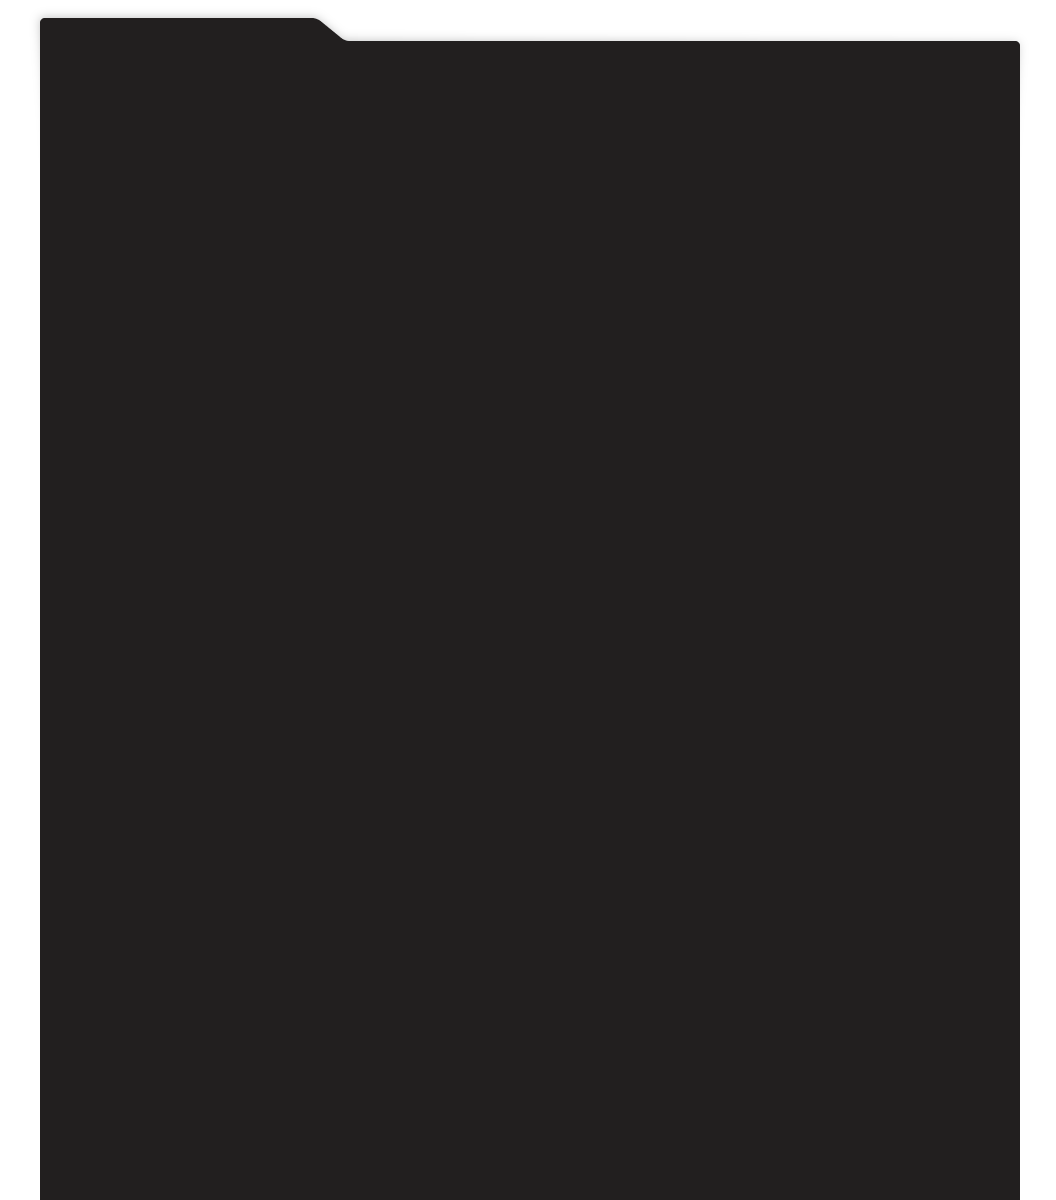
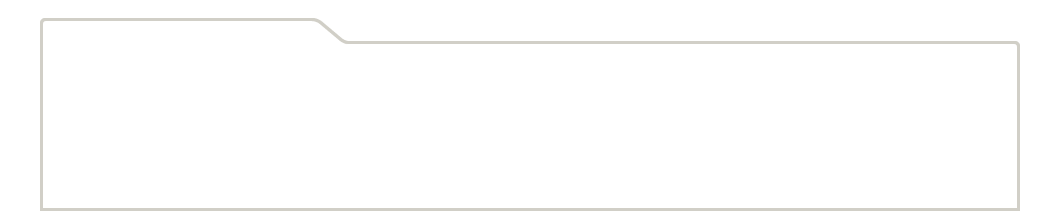
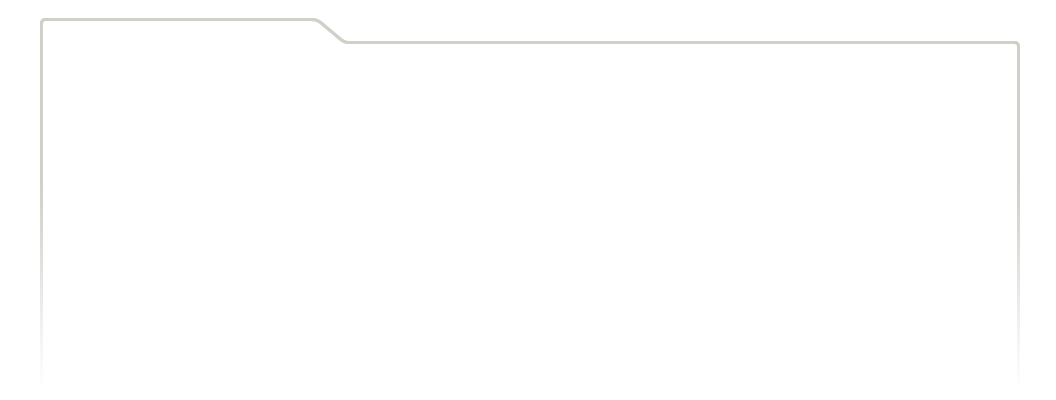
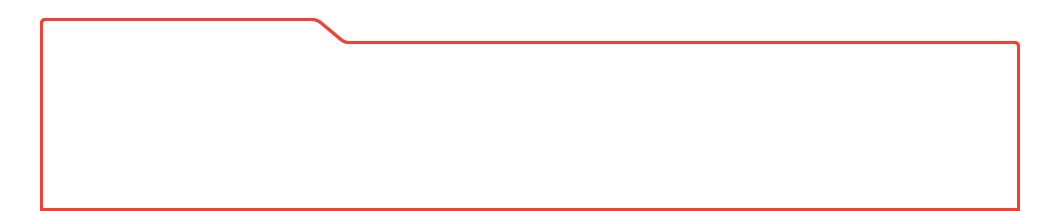
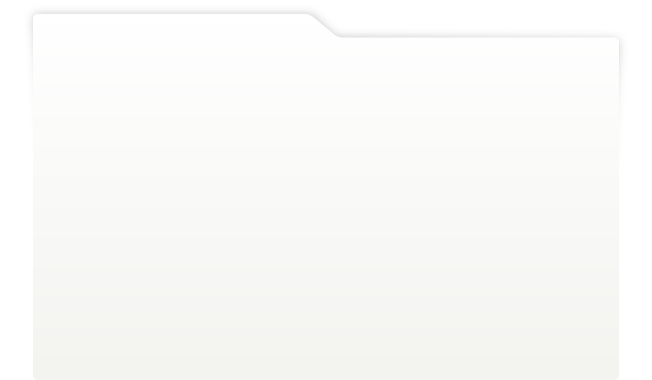
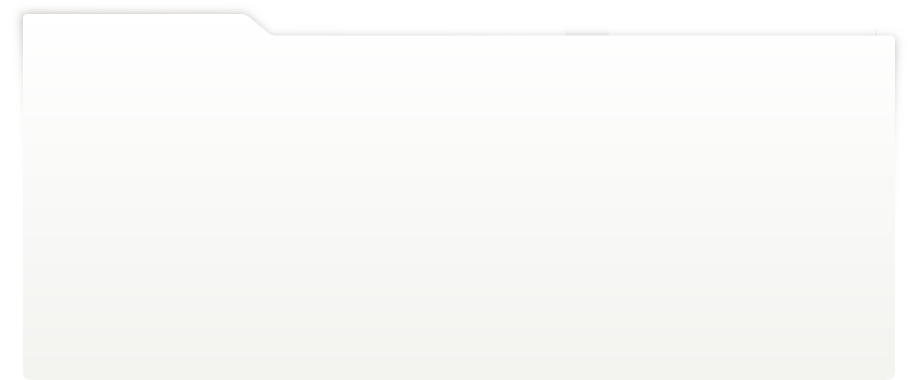
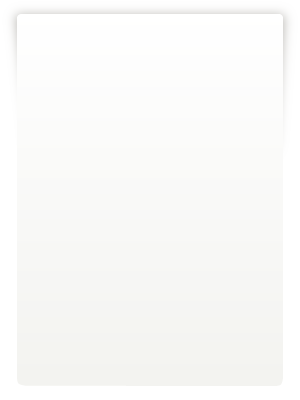
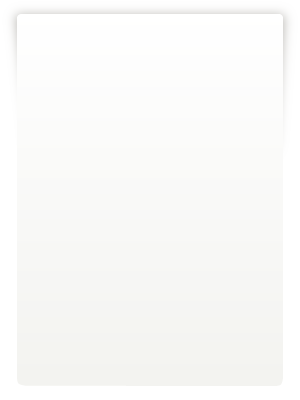
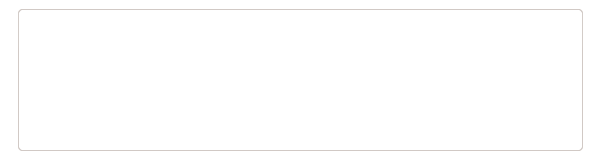
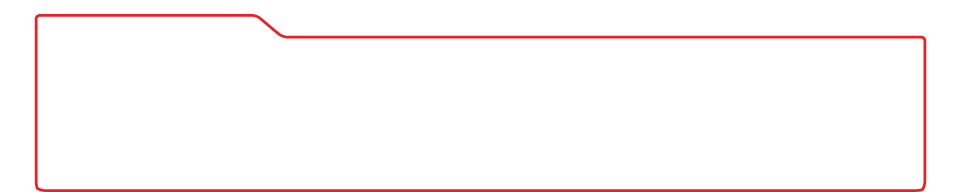
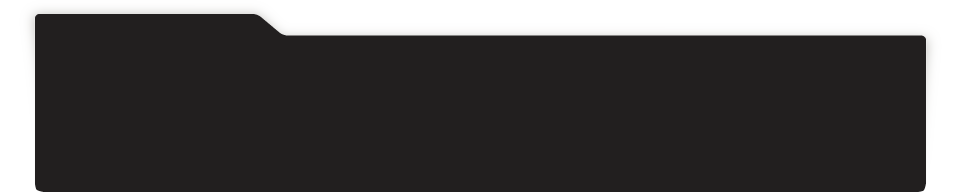
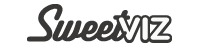
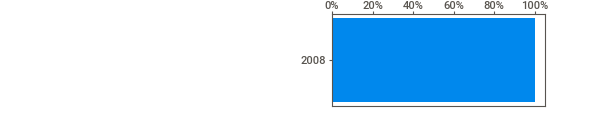
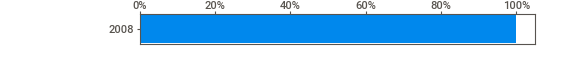
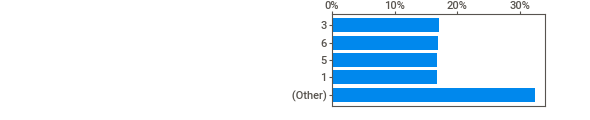
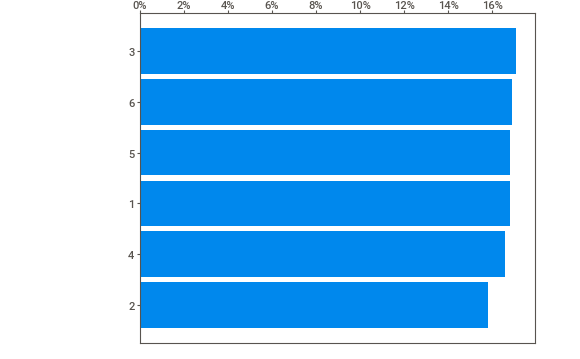
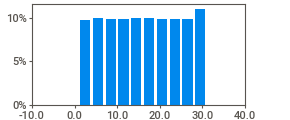
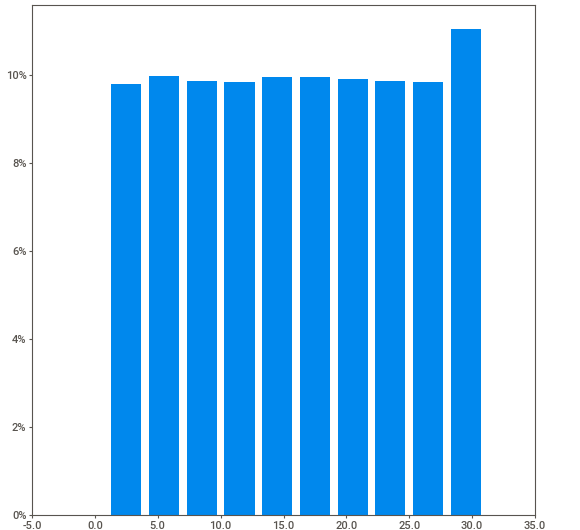
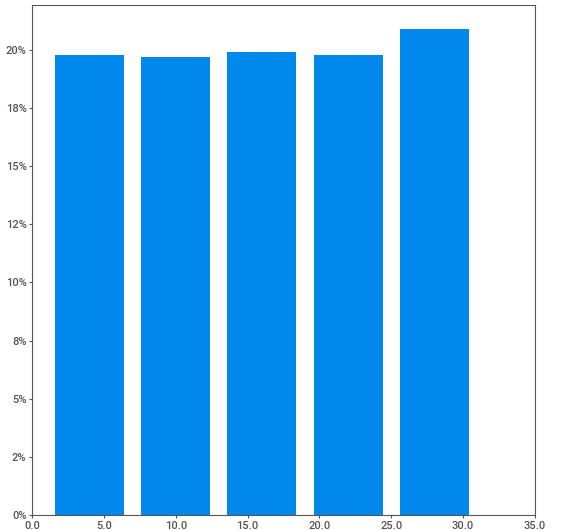
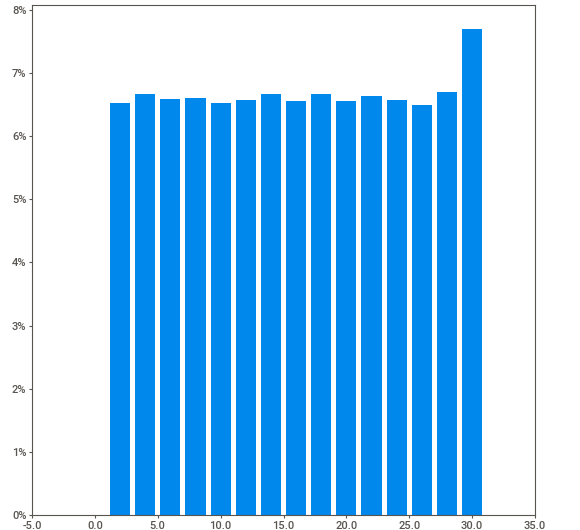
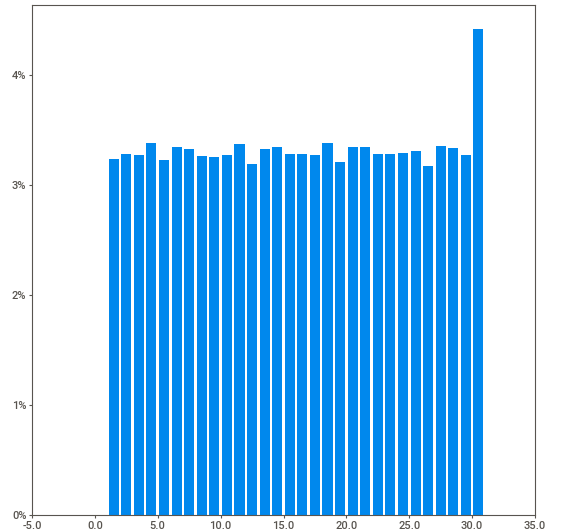
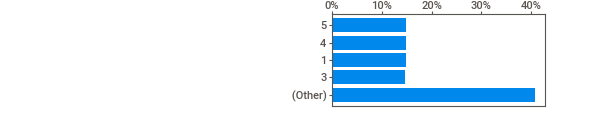
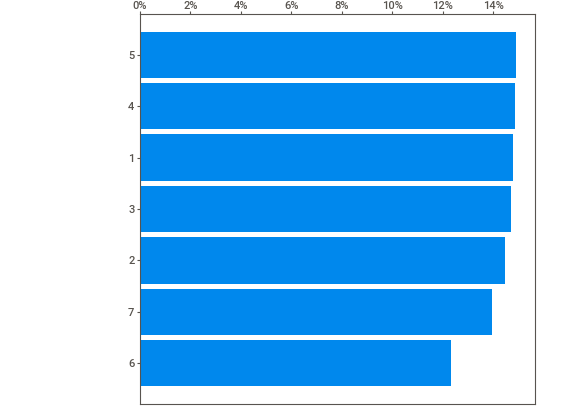
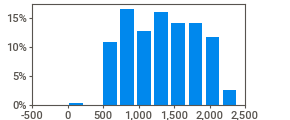
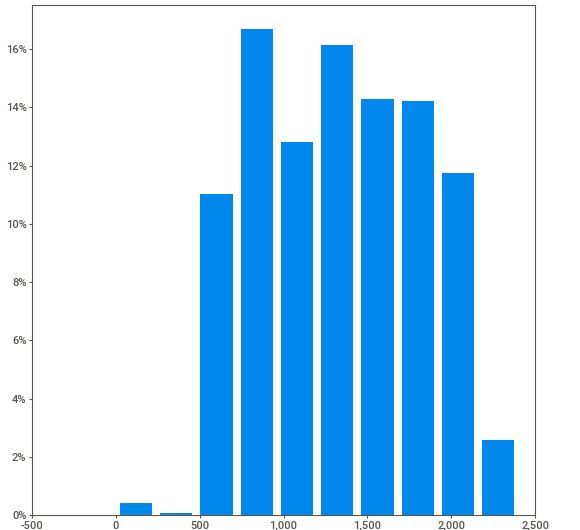
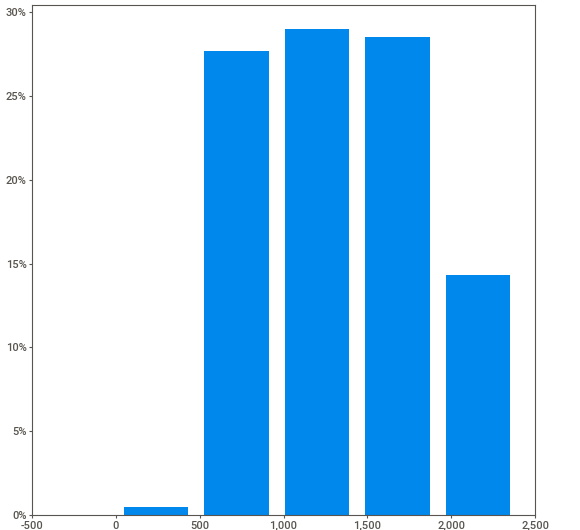
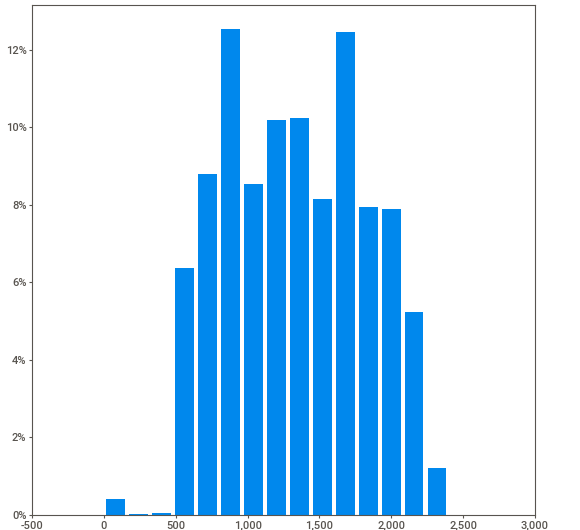
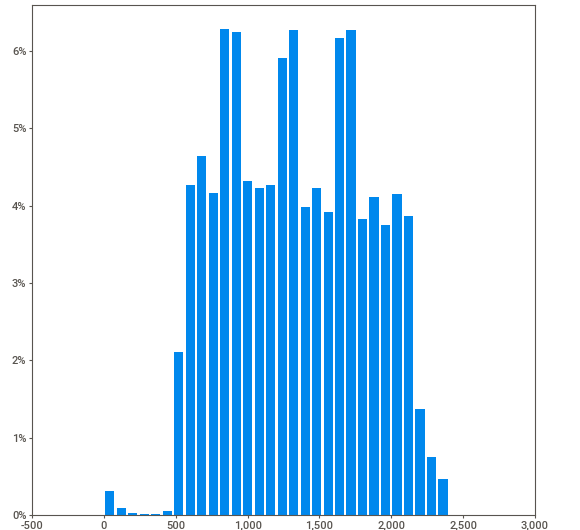
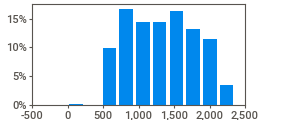
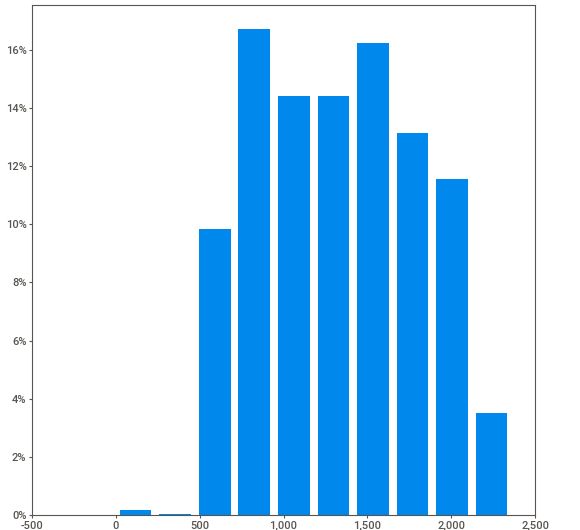
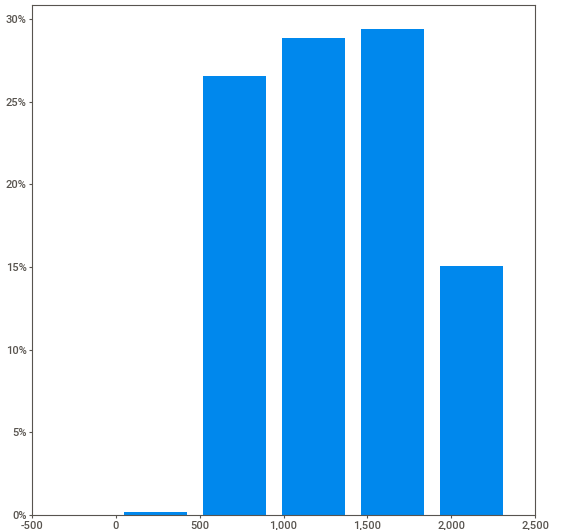
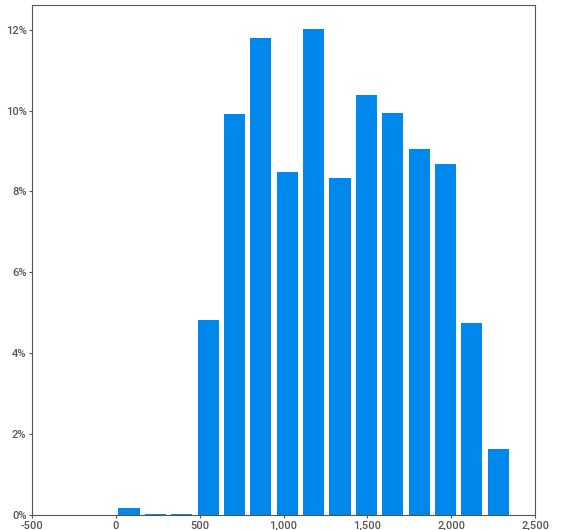
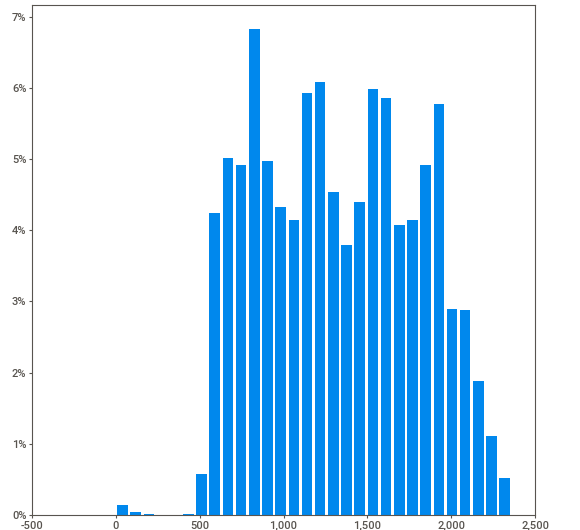
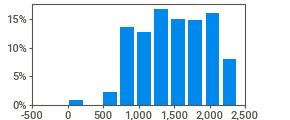
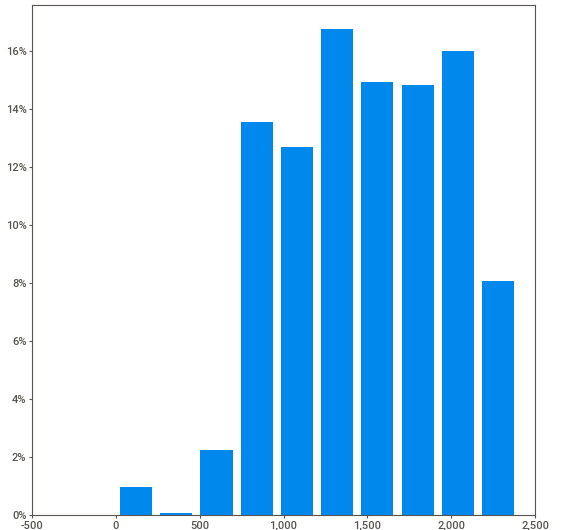
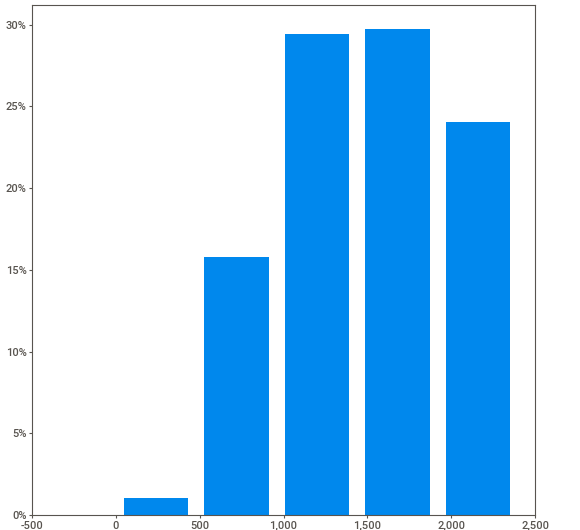
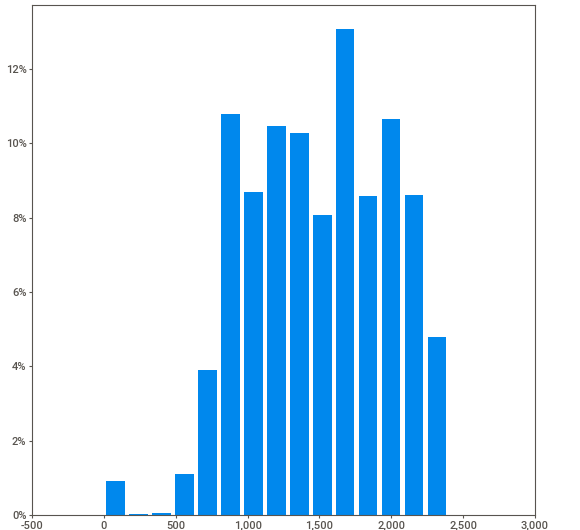
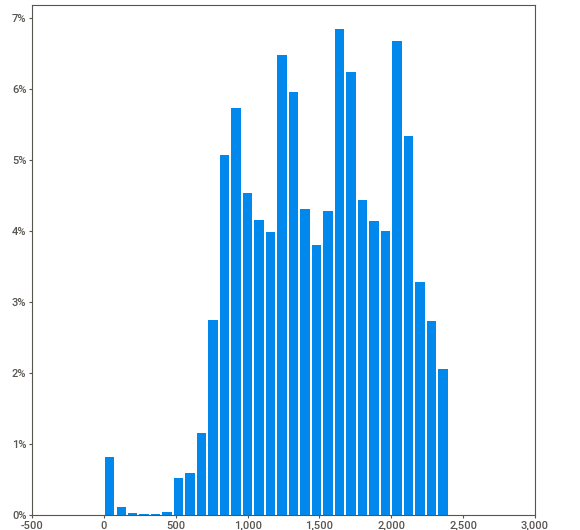
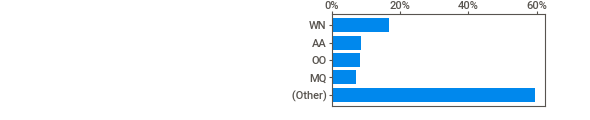
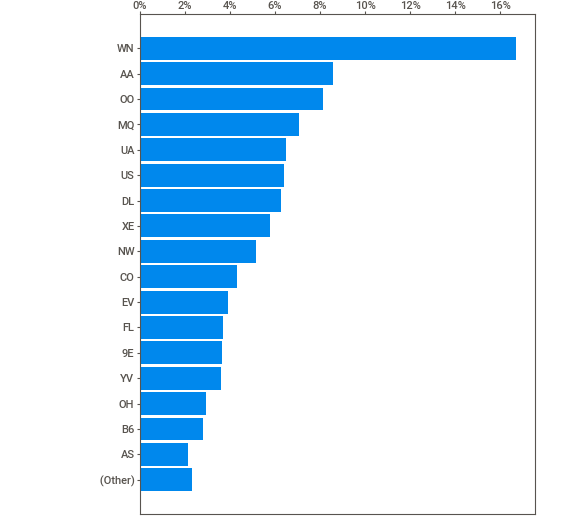
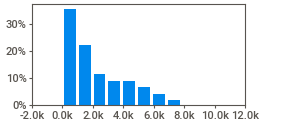
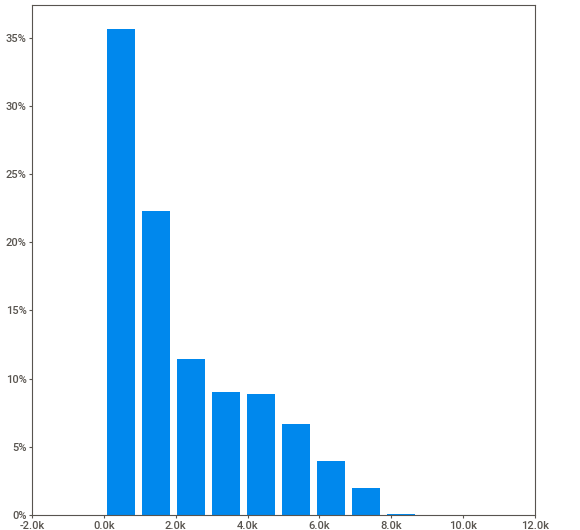
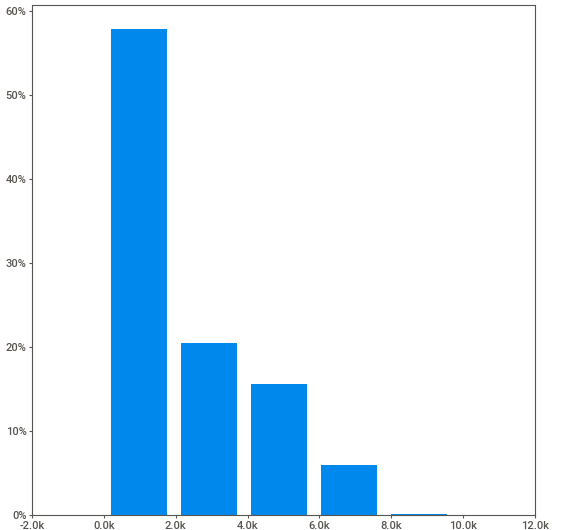
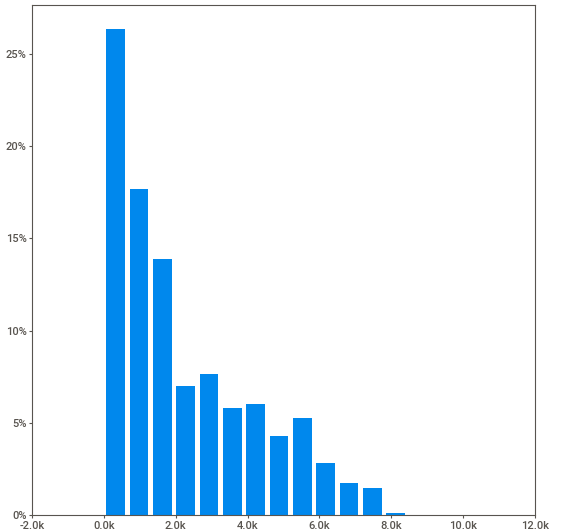
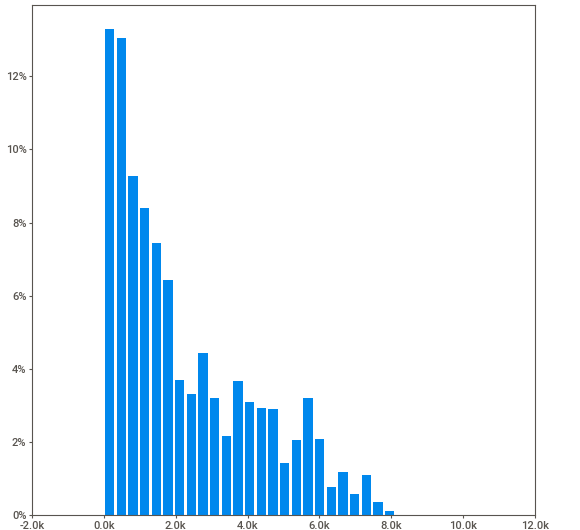
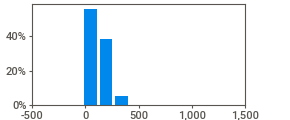
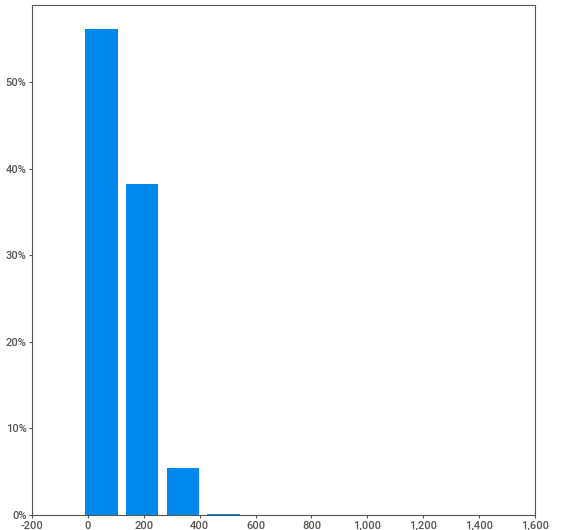
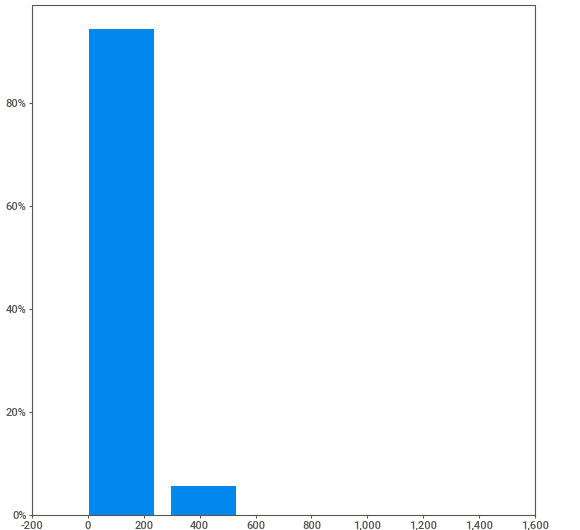
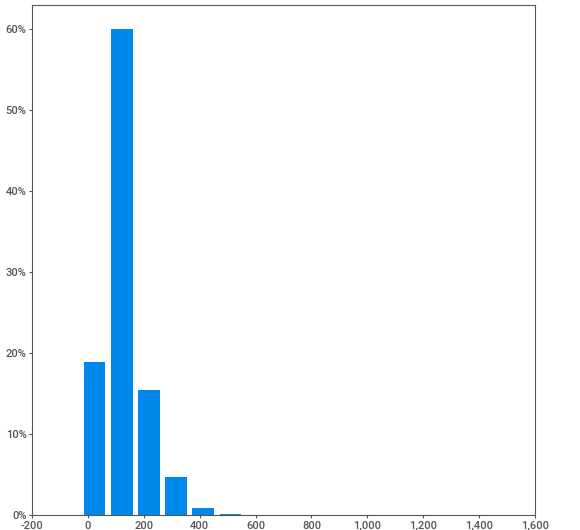
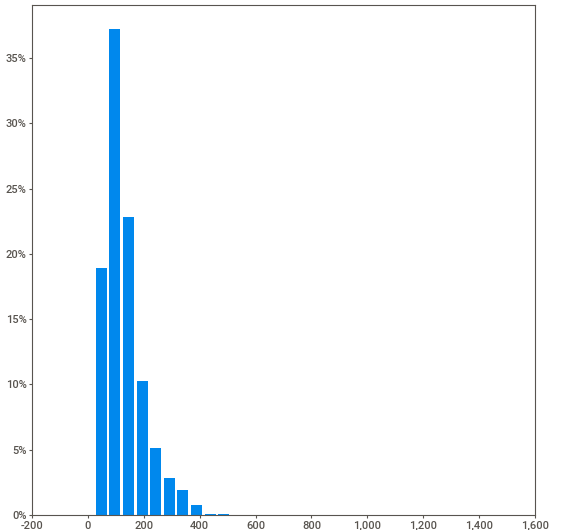
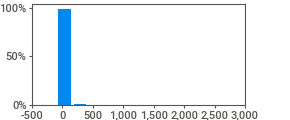
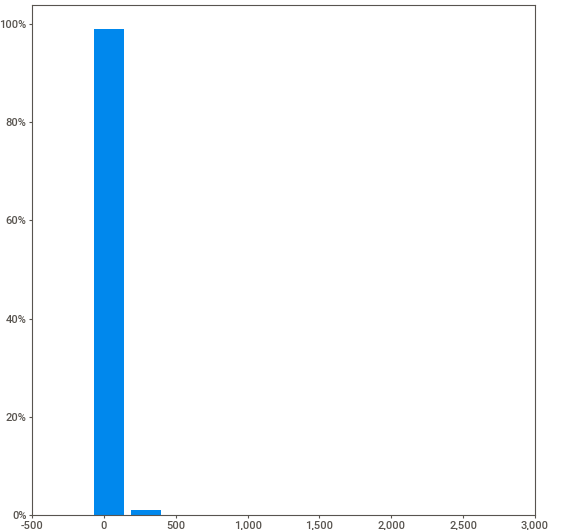
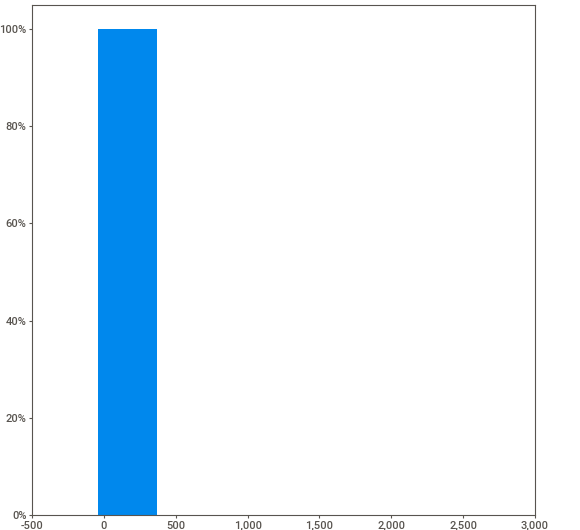
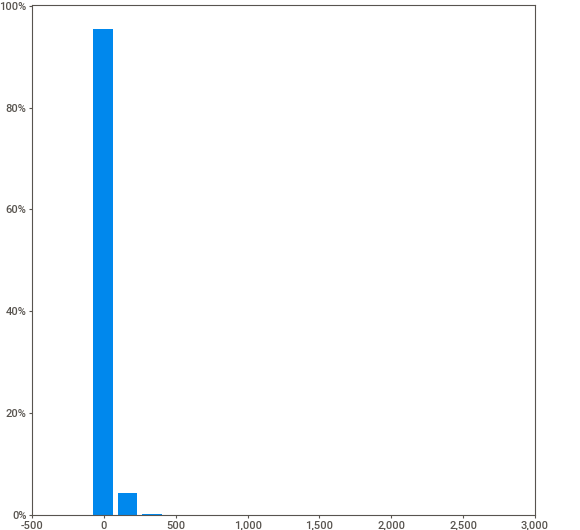
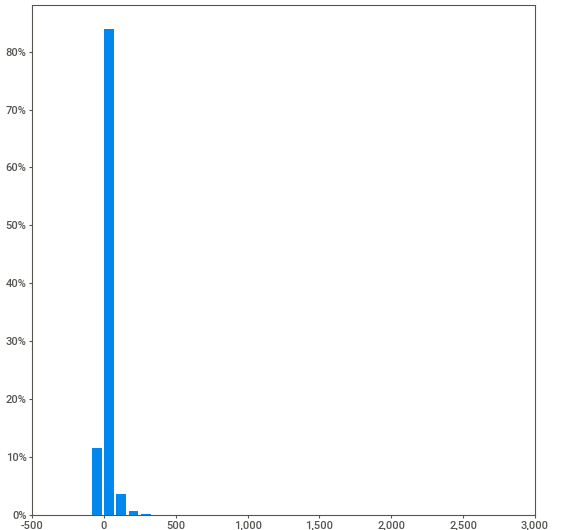
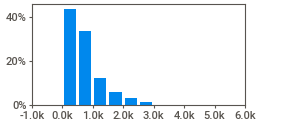
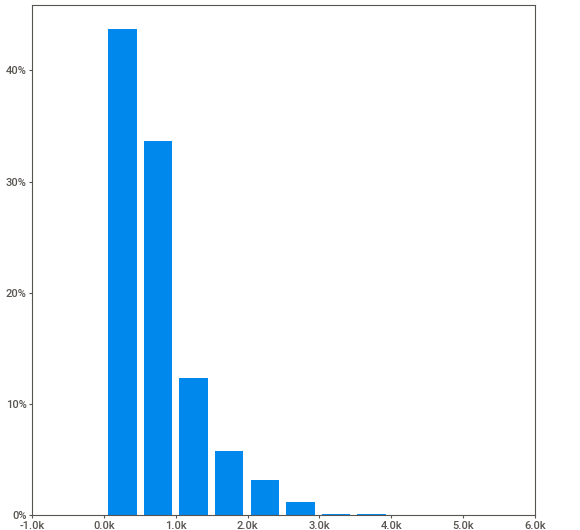
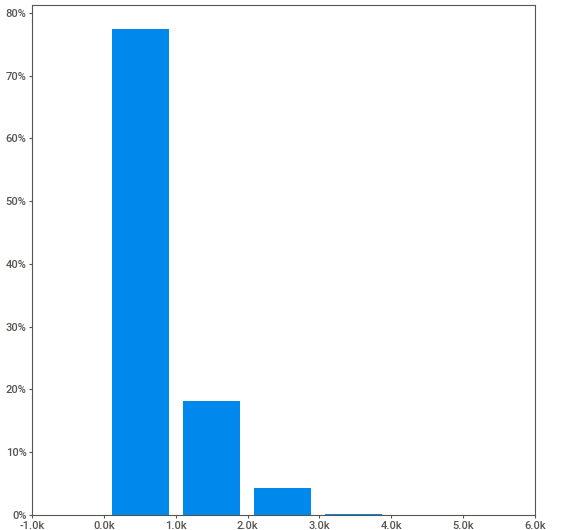
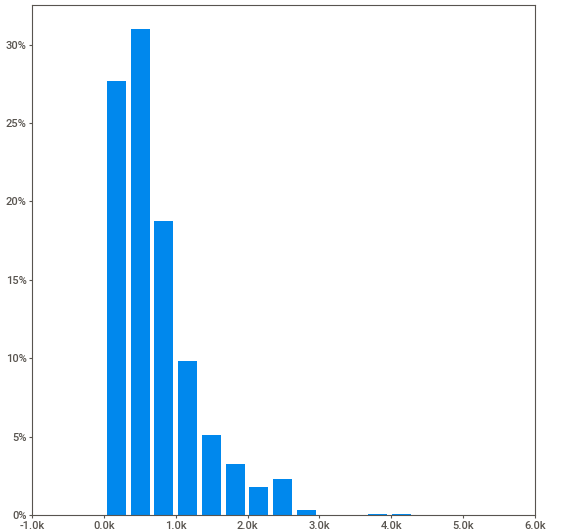
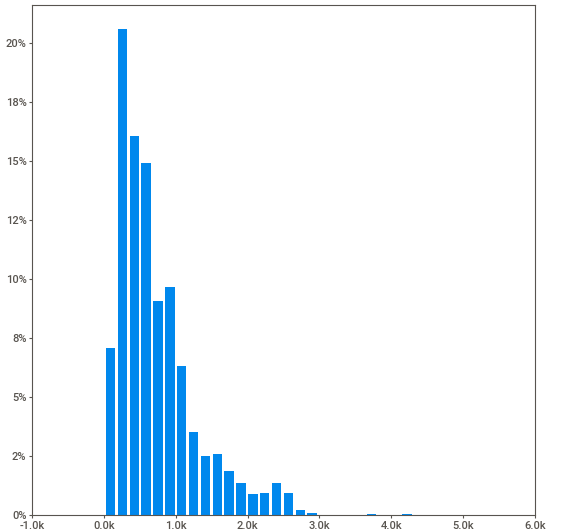
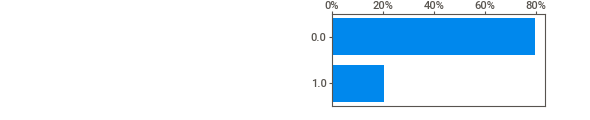
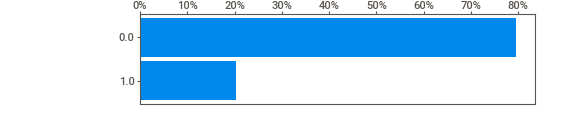
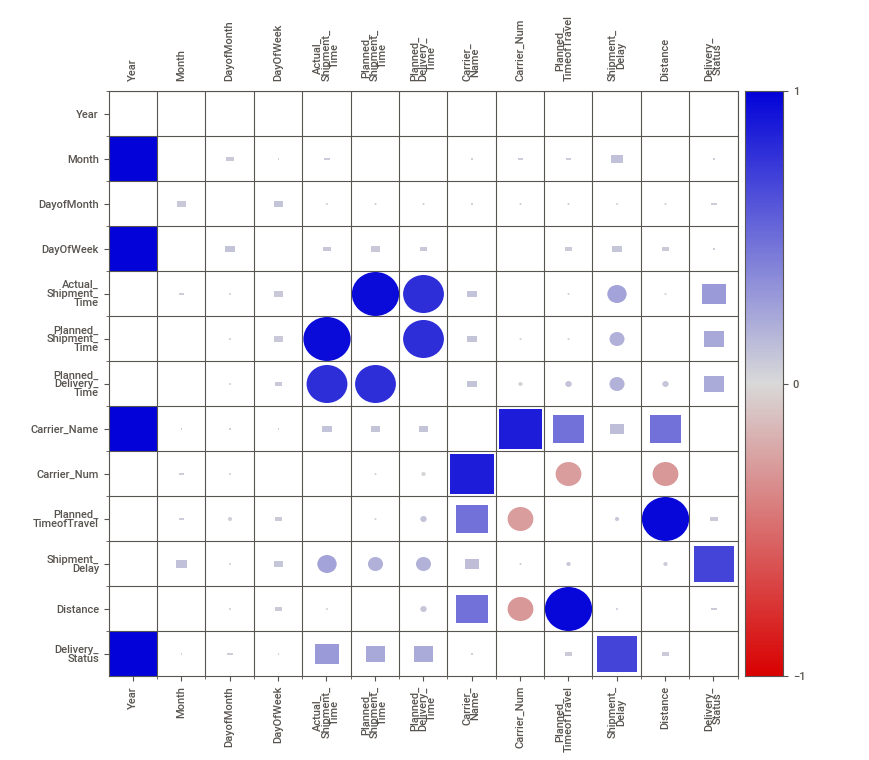
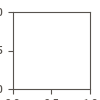

In [7]:
s = sv.analyze(data)
s.show_notebook()

    max_rows_analyzed is smaller than dataset shape 3604175...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 15)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    15 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Year']
Since Number of Rows in data 150000 exceeds maximum, randomly sampling 150000 rows for EDA...
To fix data quality issues automatically, import FixDQ from autoviz...


Number of All Scatter Plots = 6


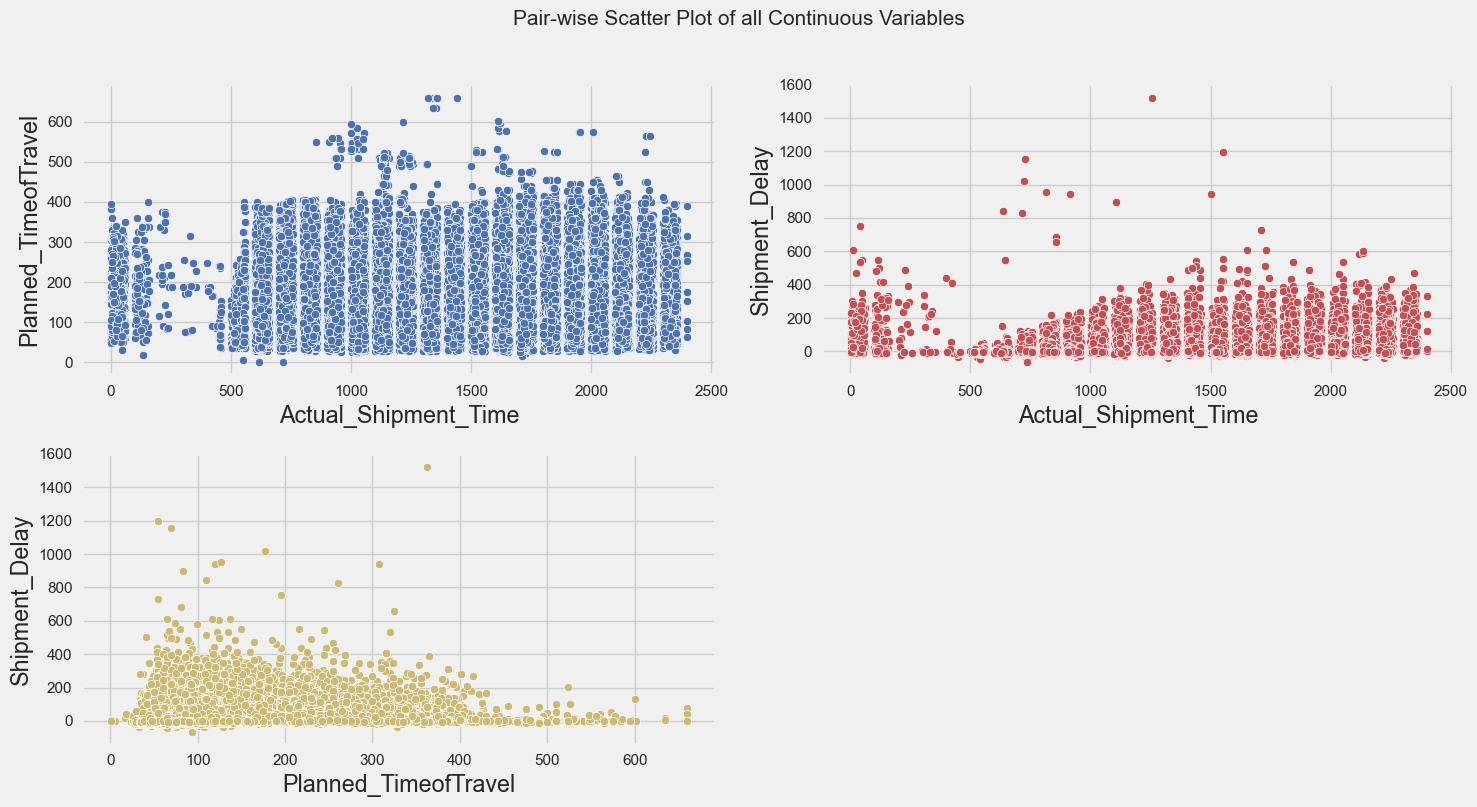

Could not draw Distribution Plot


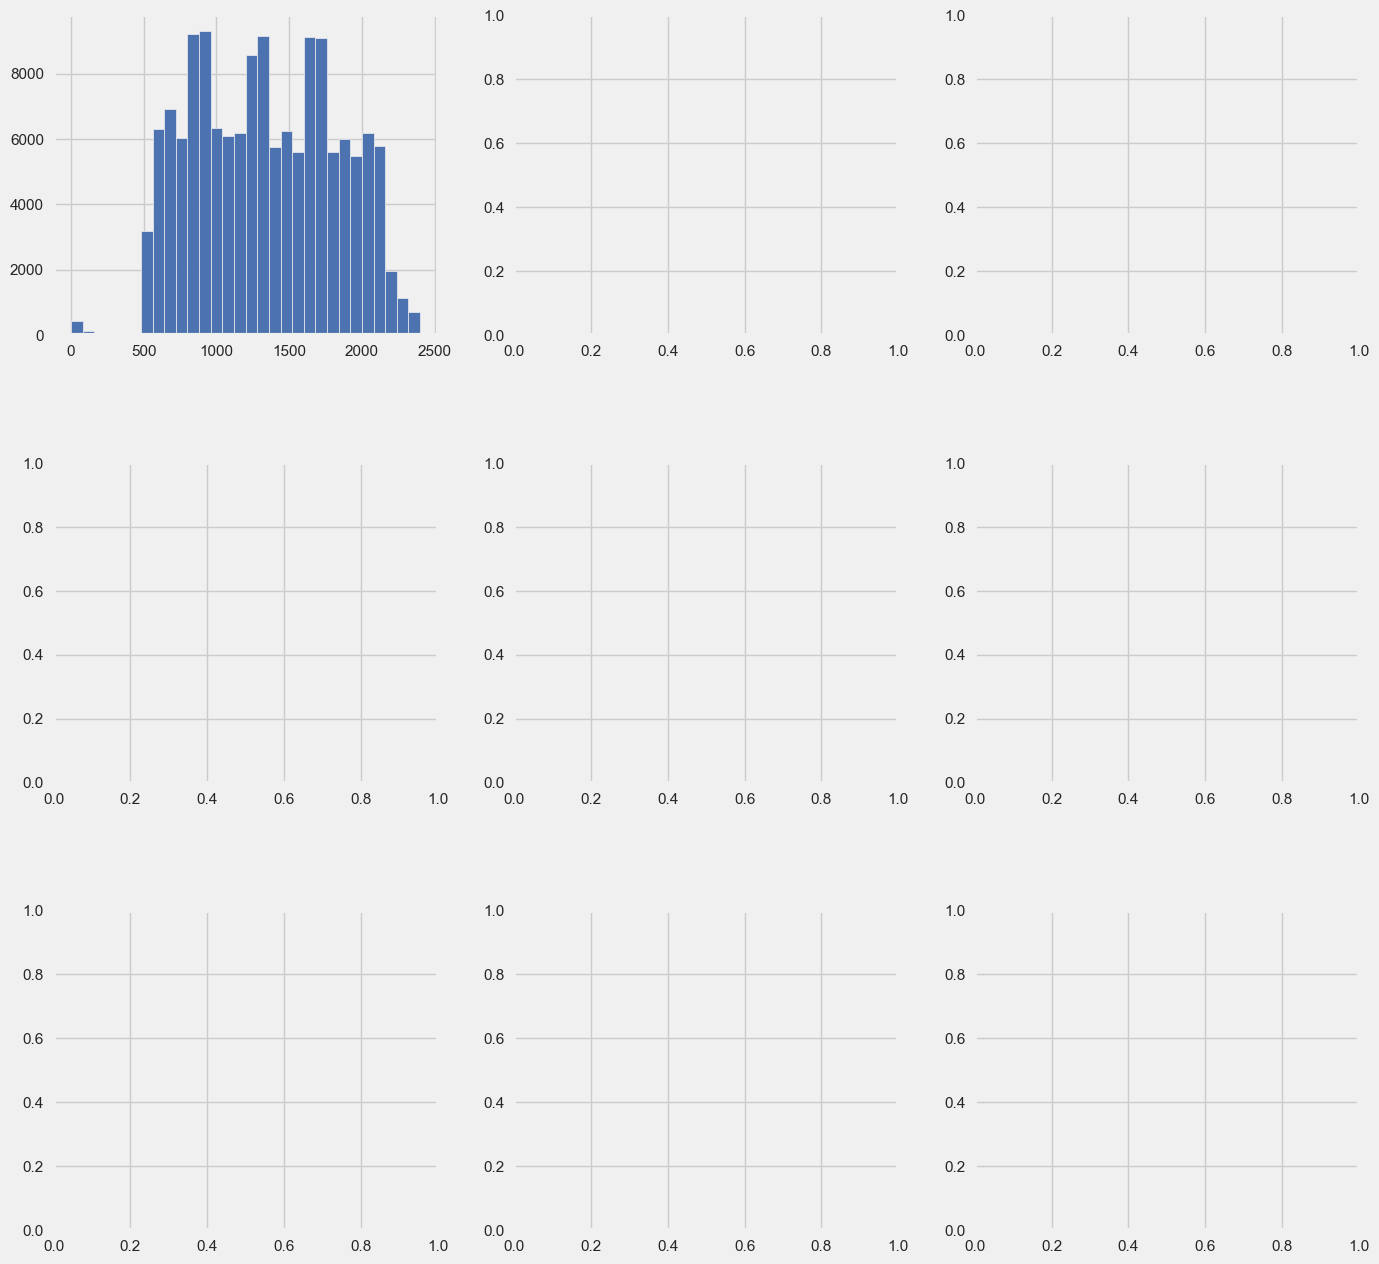

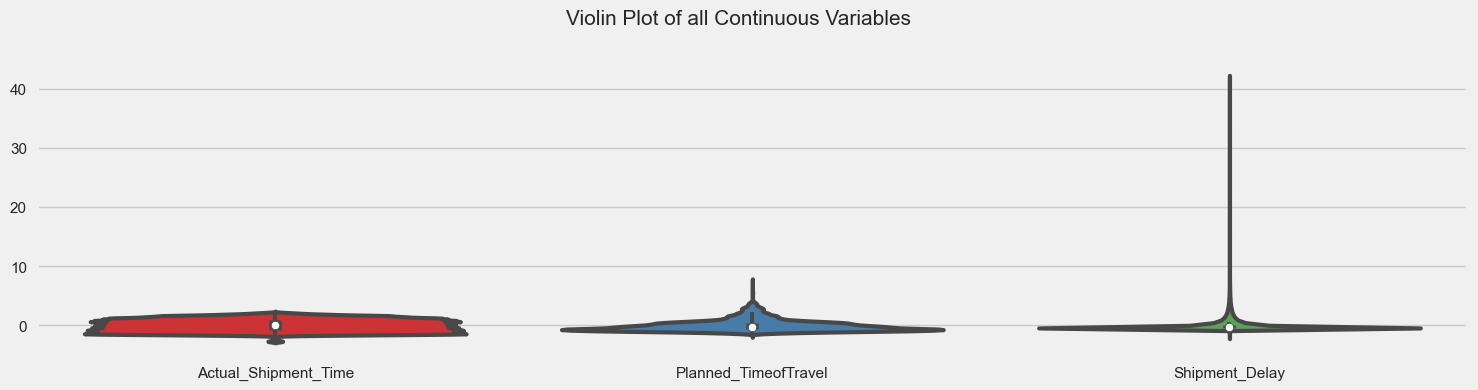

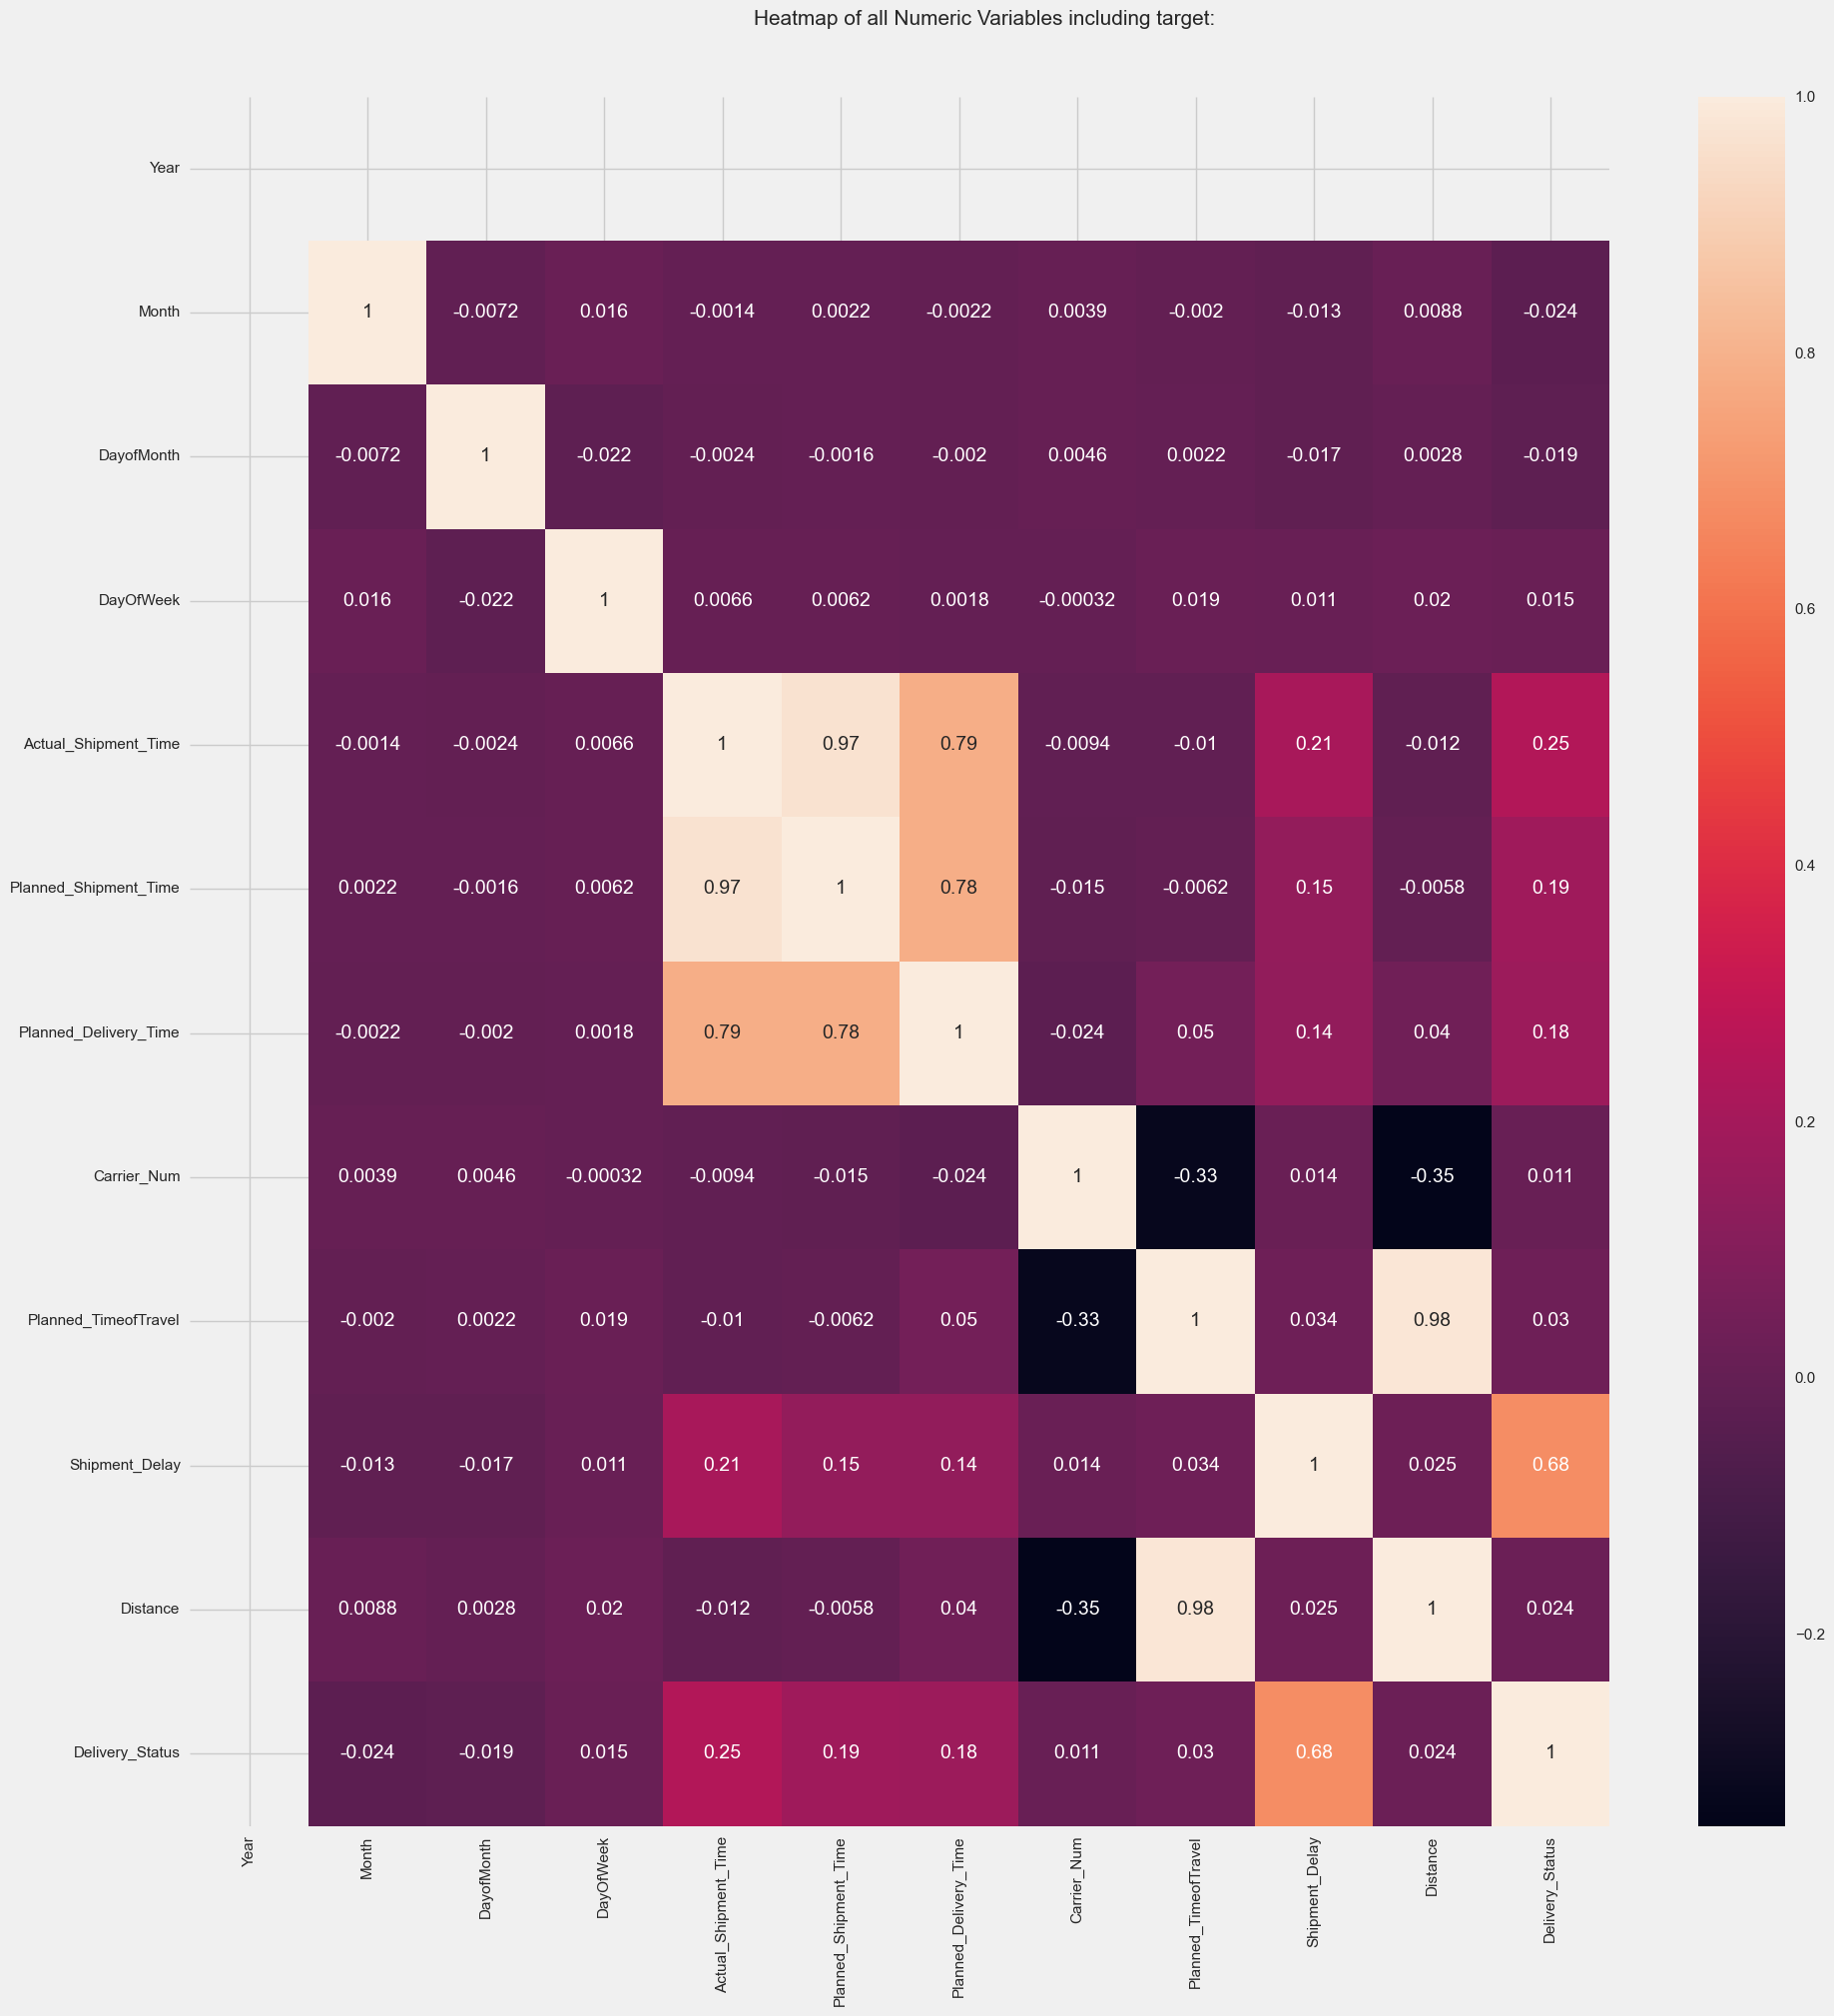

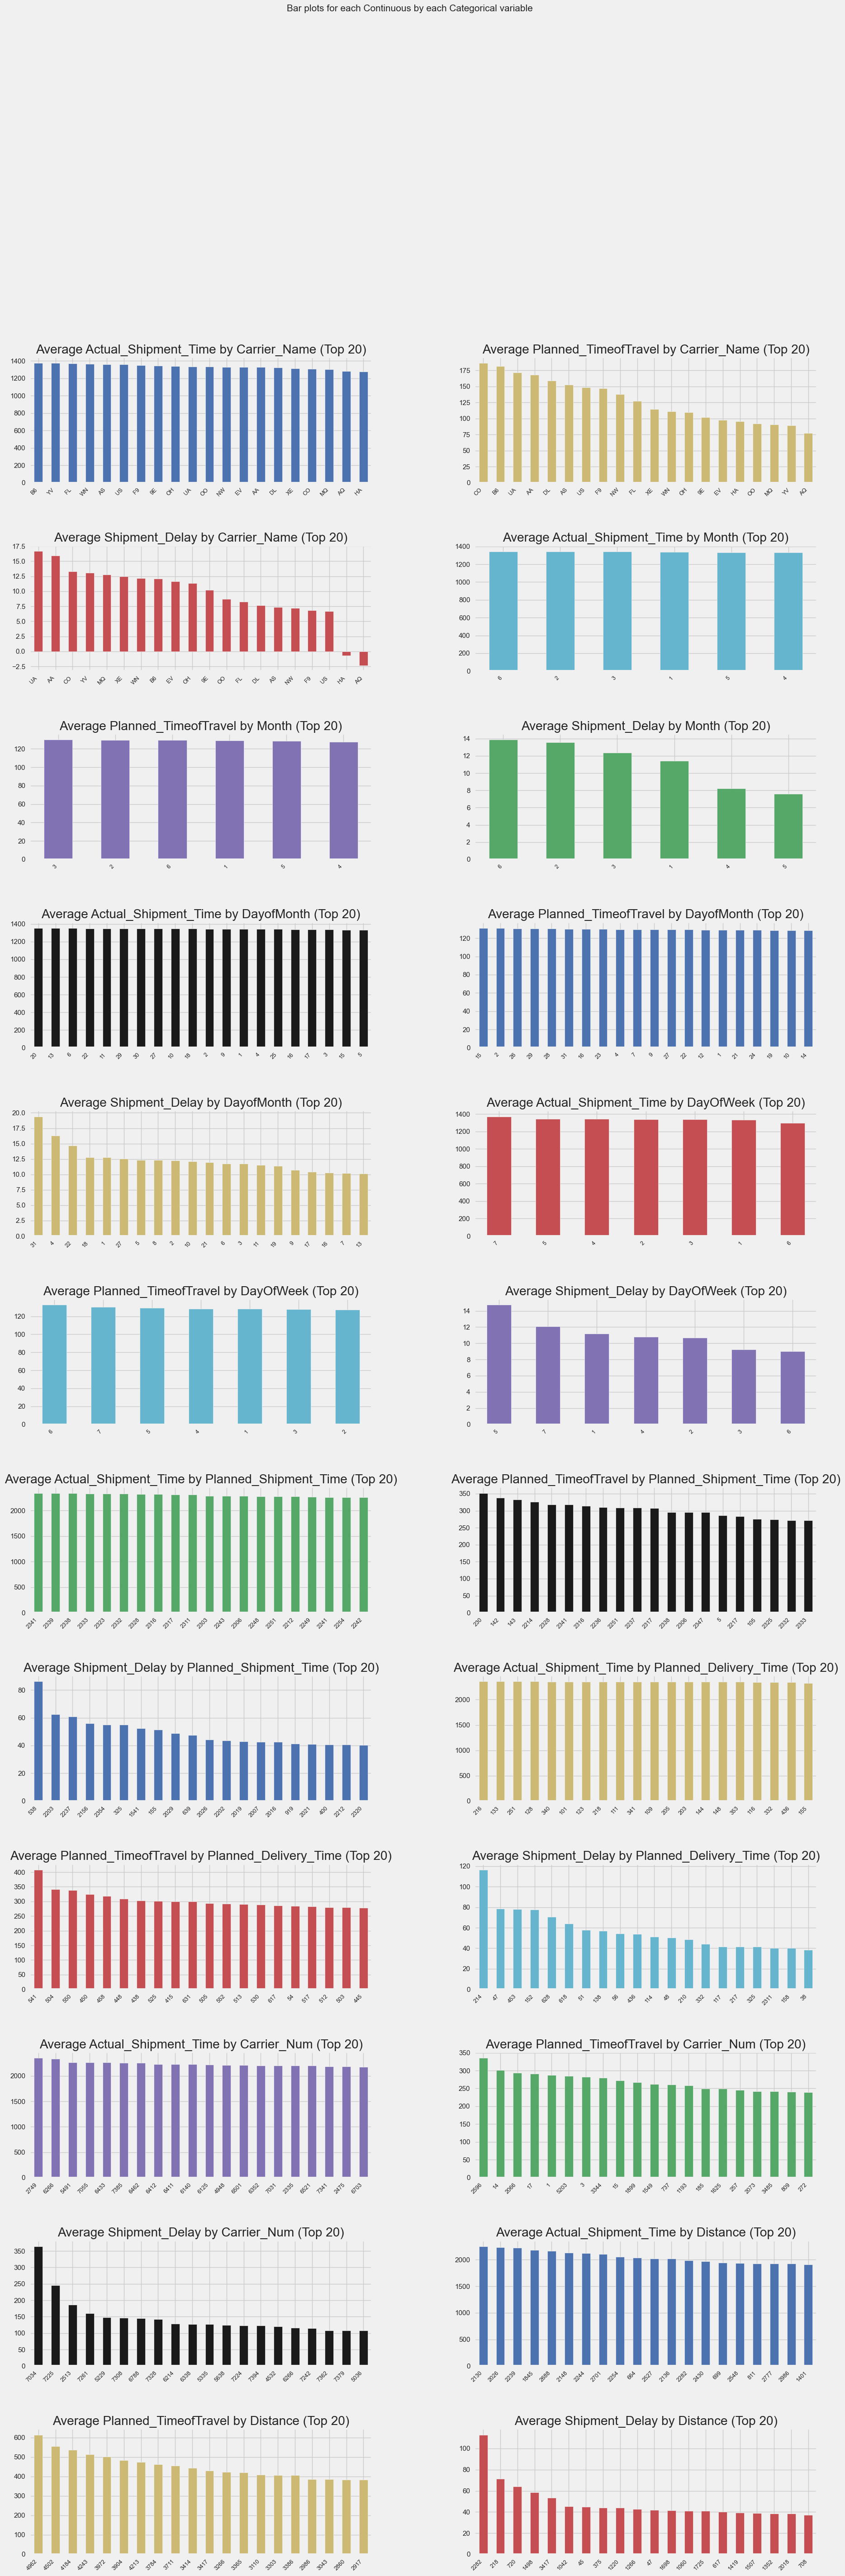

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to C:\Users\BENUDHAR
[nltk_data]    |     SAHOO\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package gazetteers to C:\Users\BENUDHAR
[nltk_data]    |     SAHOO\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gazetteers.zip.
[nltk_data]    | Downloading package genesis to C:\Users\BENUDHAR
[nltk_data]    |     SAHOO\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\genesis.zip.
[nltk_data]    | Downloading package gutenberg to C:\Users\BENUDHAR
[nltk_data]    |     SAHOO\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gutenberg.zip.
[nltk_data]    | Downloading package inaugural to C:\Users\BENUDHAR
[nltk_data]    |     SAHOO\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_dat

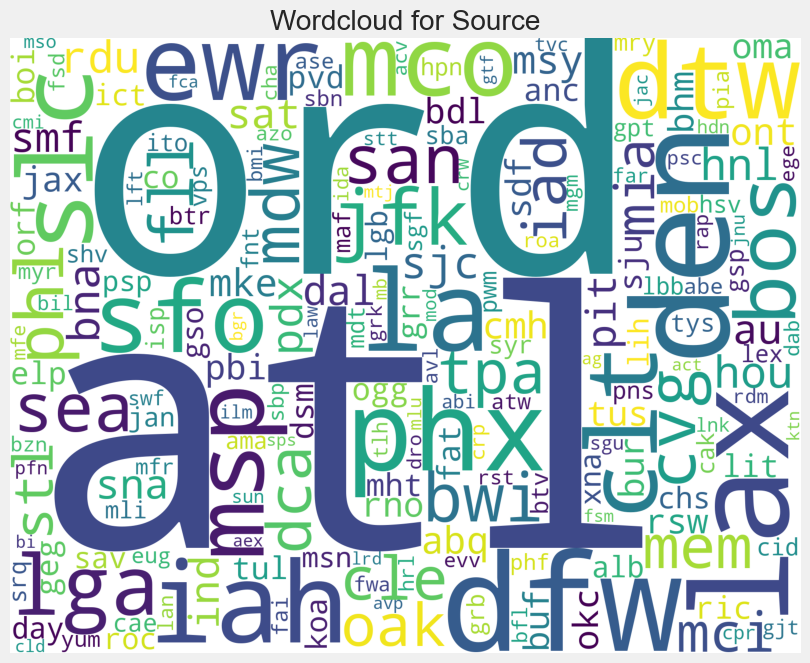

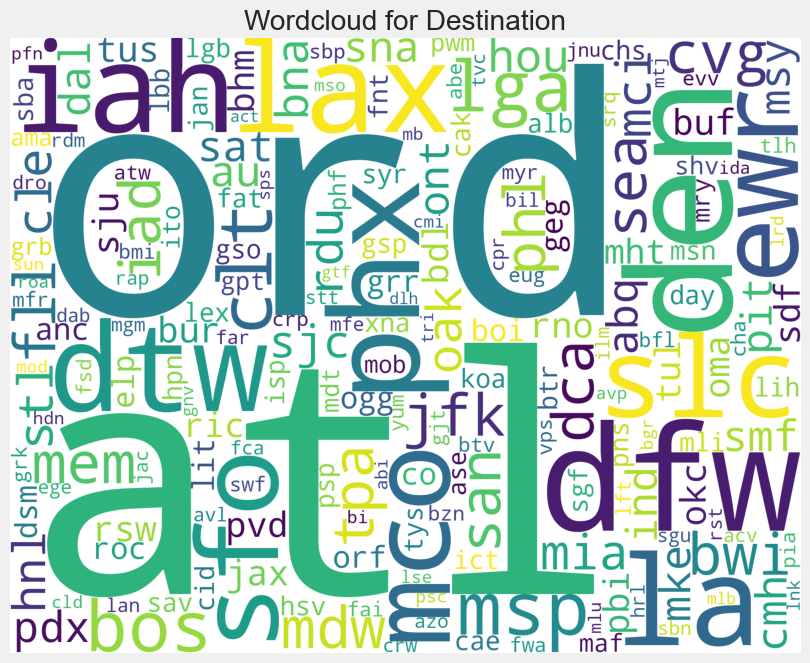

All Plots done
Time to run AutoViz = 322 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [9]:
# Autoviz
###########
# pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class

av = AutoViz_Class()
%matplotlib inline
# a= av.AutoViz(r"fedex.csv", chart_format = 'html')
a = av.AutoViz(r"fedex.csv")

In [24]:
# D-Tale
########

# pip install dtale   # In case of any error then please install werkzeug appropriate version (pip install werkzeug==2.0.3)
import dtale
import pandas as pd

In [25]:
d = dtale.show(data)
d.open_browser()